<h1><center>Set up</center></h1>

In [5]:
# relevant imports
from typing import Dict, List

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [6]:
# improving visual quality of graphs
plt.rc("axes", titlesize=18)
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rc("legend", fontsize=13)
plt.rc("font", size=13)
plt.rc("lines", linewidth=2)

In [7]:
df = pd.read_csv("masterspreadsheet_all.csv")
df.head()

,Unnamed: 0,ModelType,agents,decay_limit,discount_rate,epsilon,epsilon_decay,hidden_size,learning_rate,lookback,...,num_layers,tn_mean_score,tn_mean_time,tn_rank,tr_cooperation_percentage,tr_cumul_regret,tr_cumul_reward,tr_defection_percentage,tr_final_loss,tr_mean_reward
0,0,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,609.140323,18.849598,25.0,0.412525,57390.0,62610.0,0.587475,1.116258,1.565250
1,1,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,646.303226,21.482931,25.0,0.878275,11181.0,108819.0,0.121725,2.247977,2.720475
2,2,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,539.161290,18.026233,25.0,0.407200,66691.0,53309.0,0.592800,0.438530,1.332725
3,3,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,546.259677,31.196609,25.0,0.453475,55424.0,64576.0,0.546525,1.167565,1.614400
4,4,DQN,"TitForTat,OmegaTFT",NaN,0.95,0.2,0.0,NaN,0.001,2.0,...,NaN,534.727419,18.156603,25.0,0.568300,52790.0,67210.0,0.431700,1.256334,1.680250


In [8]:
df = df.drop("Unnamed: 0", axis=1)

In [9]:
# auxiliary function to plot visually appealing histograms
def plot_histogram(x: pd.DataFrame, bins: int, xlabel: str, ylabel: str, title: str) -> None:
    plt.figure(figsize=(15,8))
    ax = plt.gca()
    x.hist(ax=ax, bins=bins, density=True, color="xkcd:azure")
    x.plot.kde(ax=ax, color="xkcd:tangerine")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.xlim([x.min(), x.max()])

In [10]:
# auxiliary function to make line graphs more visually appealing
def plot_linegraph(x: Dict, xlabel: str, ylabel: str, title: str) -> None:
    plt.figure(figsize=(15, 10))
    df_x = pd.DataFrame(data=x)
    plt.plot(df_x[xlabel], df_x[ylabel])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [11]:
def plot_barchart(x: Dict, xlabel: str, ylabel: str, title: str, rotate: bool = True) -> None:
    plt.figure(figsize=(12, 12))
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.bar(x[xlabel], x[ylabel], width=0.4, color="xkcd:azure")
    plt.xticks(rotation=rotate)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

<h1><center>Analysis of results</center></h1>

<h2>Did Q-Network agents fare better than tabular learners?</h2>

In [ ]:
df2 = pd.read_csv("results/")

In [8]:
df[pd.isnull(df["ModelType"])]

,ModelType,agents,decay_limit,discount_rate,epsilon,epsilon_decay,hidden_size,learning_rate,lookback,n1,...,num_layers,tn_mean_score,tn_mean_time,tn_rank,tr_cooperation_percentage,tr_cumul_regret,tr_cumul_reward,tr_defection_percentage,tr_final_loss,tr_mean_reward
2336,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.001,1.0,NaN,...,NaN,399.333871,2.821025,31.0,0.642600,77419.0,522581.0,0.357400,NaN,2.612905
2337,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.001,1.0,NaN,...,NaN,439.635484,2.673221,31.0,0.166975,313231.0,286769.0,0.833025,NaN,1.433845
2338,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.010,1.0,NaN,...,NaN,676.045161,0.803082,25.0,0.882550,26401.0,573599.0,0.117450,NaN,2.867995
2339,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.010,1.0,NaN,...,NaN,688.153226,0.733928,25.0,0.870780,33946.0,566054.0,0.129220,NaN,2.830270
2340,NaN,"TitForTat,Downing",NaN,0.99,0.01,0.0,NaN,0.001,2.0,NaN,...,NaN,666.256452,0.737969,25.0,0.643330,119702.0,480298.0,0.356670,NaN,2.401490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,NaN,Borufsen,0.05,0.99,0.10,0.0,NaN,0.100,10.0,NaN,...,NaN,722.812581,4.406982,24.0,0.908120,221732.0,5778268.0,0.091880,NaN,2.889134
4231,NaN,Borufsen,0.05,0.95,0.20,0.0,NaN,0.010,10.0,NaN,...,NaN,715.381613,4.206030,25.0,0.627424,1496352.0,4503648.0,0.372576,NaN,2.251824
4232,NaN,Borufsen,0.05,0.99,0.20,0.0,NaN,0.010,10.0,NaN,...,NaN,434.066129,30.187939,30.0,0.602185,1732151.0,4267849.0,0.397815,NaN,2.133925
4233,NaN,Borufsen,0.05,0.95,0.20,0.0,NaN,0.100,10.0,NaN,...,NaN,709.700968,4.100973,25.0,0.730523,1134159.0,4865841.0,0.269477,NaN,2.432920


In [12]:
df_dqn = df[df["ModelType"] == "DQN"]
df_rnn = df[df["ModelType"] == "RNN"]
df_gru = df[df["ModelType"] == "GRU"]
df_tabular = df[pd.isnull(df["ModelType"])]

In [10]:
print(f"The number of DQN agents is {len(df_dqn)}")
print(f"The number of RNN agents is {len(df_rnn)}")
print(f"The number of GRU agents is {len(df_gru)}")
print(f"The number of tabular agents is {len(df_tabular)}")

The number of DQN agents is 1894
The number of RNN agents is 439
The number of GRU agents is 3
The number of tabular agents is 1899


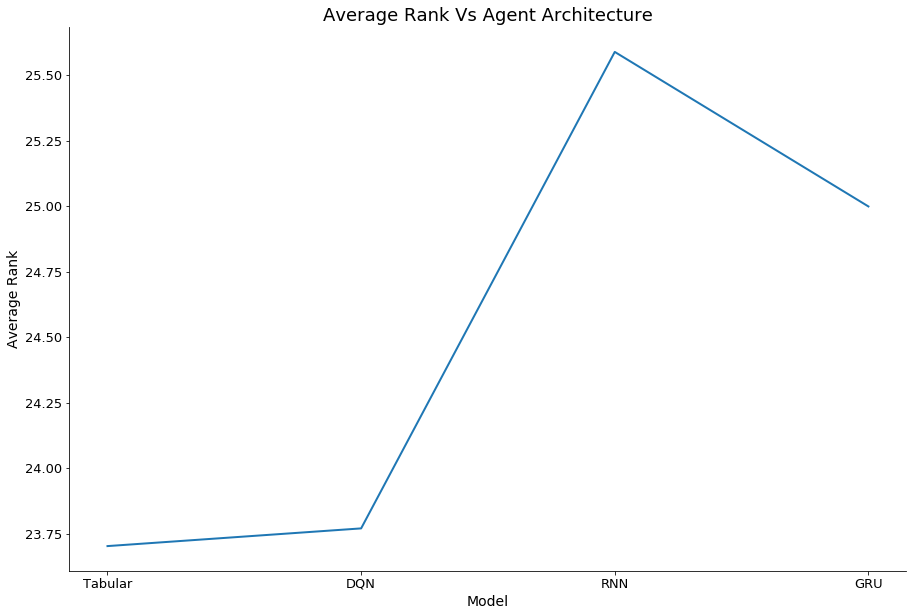

In [11]:
avg_rank_networks = {
    "Model" : ["Tabular", "DQN", "RNN", "GRU"],
    "Average Rank" : [
        df_tabular["tn_rank"].sum() / len(df_tabular),
        df_dqn["tn_rank"].sum() / len(df_dqn),
        df_rnn["tn_rank"].sum() / len(df_rnn),
        df_gru["tn_rank"].sum() / len(df_gru),
    ]
}

plot_linegraph(avg_rank_networks, "Model", "Average Rank", "Average Rank Vs Agent Architecture")

In [12]:
for i, model in enumerate(avg_rank_networks["Model"]):
    print(f"{model} had an average rank of {avg_rank_networks['Average Rank'][i]}")

Tabular had an average rank of 23.703308758994204
DQN had an average rank of 23.770855332629356
RNN had an average rank of 25.58997722095672
GRU had an average rank of 25.0


<h3>It looks as though tabular Q-learners perform the best, followed by DQN. Out of the four models, RNN performs the most poorly. Due to stochastic nature of our project, the results for GRU may not be reliable, and so would require further investigation to verify that it is indeed worse than DQN and tabular.
    

Henceforth, I will exclude GRU and RNN from analysis.</h3>

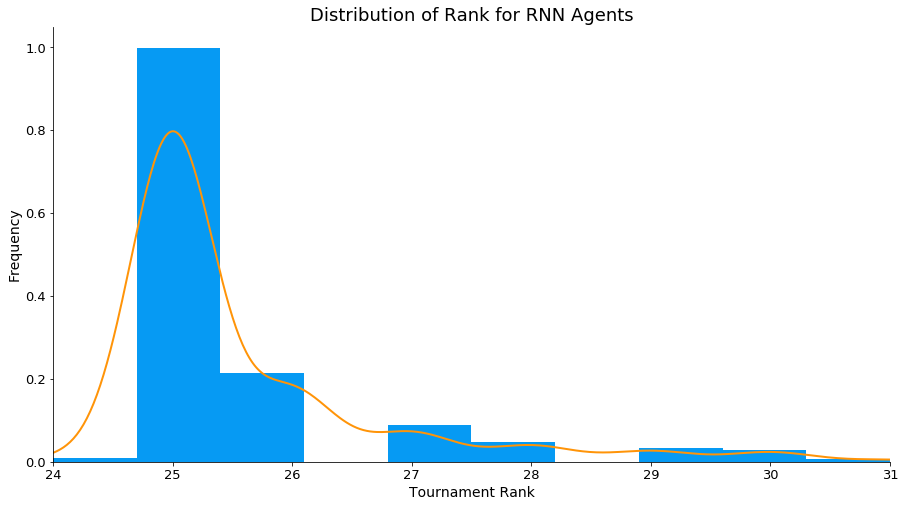

In [13]:
plot_histogram(df_rnn["tn_rank"], 10, "Tournament Rank", "Frequency", "Distribution of Rank for RNN Agents")

In [14]:
df = df[~(df["ModelType"] == "RNN")]
df = df[~(df["ModelType"] == "GRU")]
df["ModelType"].value_counts()

DQN    1894
Name: ModelType, dtype: int64

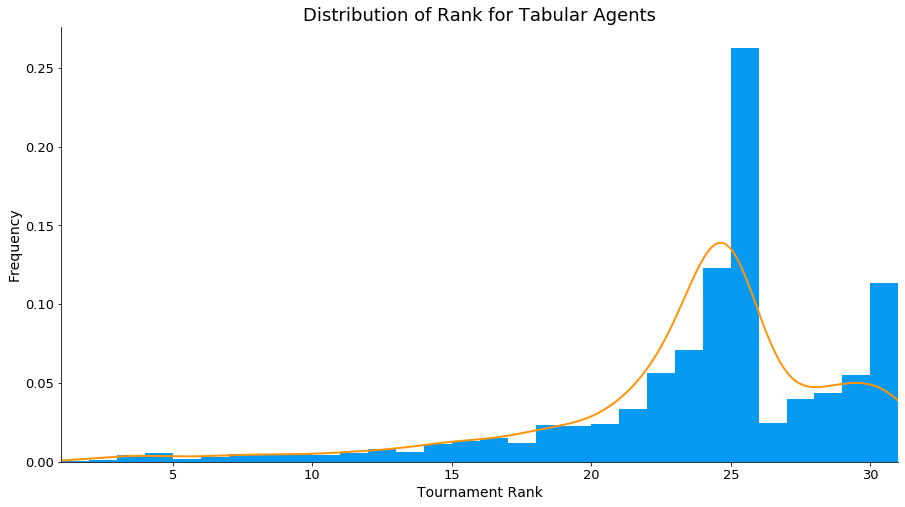

In [15]:
plot_histogram(df_tabular["tn_rank"], 30, "Tournament Rank", "Frequency", "Distribution of Rank for Tabular Agents")

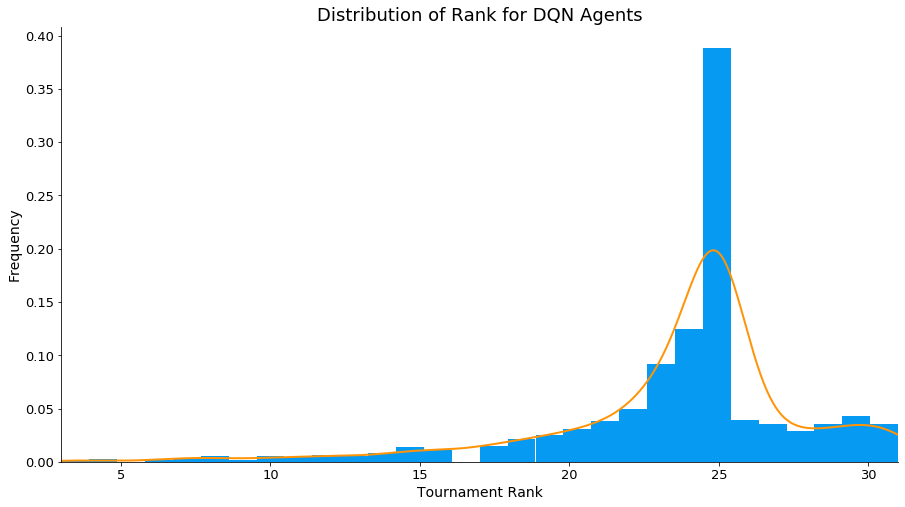

In [16]:
plot_histogram(df_dqn["tn_rank"], 30, "Tournament Rank", "Frequency", "Distribution of Rank for DQN Agents")

In [13]:
df_dqn["agents"] = df_dqn["agents"].apply(lambda x: x.split(","))
df_tabular["agents"] = df_tabular["agents"].apply(lambda x: str(x).split(","))

C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
def calc_pool_avg_rank_count(df:  pd.DataFrame) -> List[List]:
    pool_counts = list(zip(df["agents"].value_counts().index.to_list(), df["agents"].value_counts().to_list()))
    pool_avgs = []
    for r_idx, row in df.iterrows():
        found = 0
        for elem in pool_avgs:
            if elem[0] == row["agents"]:
                elem[1] += row["tn_rank"]
                found = 1
        if not found:
            pool_avgs.append([row["agents"], row["tn_rank"]])

    for pool in pool_avgs:
        for item in pool_counts:
            if pool[0] == item[0]:
                pool[1] = pool[1] / item[1]
                pool.append(item[1])
                break
    return pool_avgs

In [15]:
dqn_pool = calc_pool_avg_rank_count(df_dqn)
dqn_pool = sorted(dqn_pool, key=lambda x: x[1])
for pool in dqn_pool:
    print(f"Pool: {pool[0]},\nAvg Rank: {pool[1]},\nCount: {pool[2]}\n")

Pool: ['TitForTat'],
Avg Rank: 22.544444444444444,
Count: 180

Pool: ['TitForTat', 'OmegaTFT', 'AllC', 'AllD'],
Avg Rank: 23.583333333333332,
Count: 48

Pool: ['TitForTat', 'TidemanAndChieruzzi', 'Nydegger', 'Grofman', 'Shubik'],
Avg Rank: 23.8015873015873,
Count: 1008

Pool: ['TitForTat', 'OmegaTFT', 'TFTT', 'TTFT', 'GradualTFT', 'GenerousTFT'],
Avg Rank: 23.939814814814813,
Count: 216

Pool: ['TTFT', 'SteinAndRapoport', 'OmegaTFT', 'SecondByWeiner', 'Borufsen'],
Avg Rank: 23.958333333333332,
Count: 96

Pool: ['TitForTat', 'AllC', 'AllD'],
Avg Rank: 23.977777777777778,
Count: 180

Pool: ['TitForTat', 'Nydegger', 'Downing', 'TidemanAndChieruzzi', 'Champion', 'Borufsen', 'SecondByGraaskampKatzen'],
Avg Rank: 24.09090909090909,
Count: 77

Pool: ['TitForTat', 'Nydegger', 'TidemanAndChieruzzi', 'Champion', 'Borufsen', 'SecondByGraaskampKatzen'],
Avg Rank: 24.333333333333332,
Count: 12

Pool: ['TitForTat', 'OmegaTFT'],
Avg Rank: 24.75,
Count: 76

Pool: ['TitForTat', 'Nydegger', 'TidemanAndC

In [16]:
def df_pool(df: pd.DataFrame, pool: List[str]) -> pd.DataFrame:
    ret = pd.DataFrame(columns=df.columns)
    for r_idx, row in df.iterrows():
        if row["agents"] == pool:
            ret = ret.append(row.to_dict(), ignore_index=True)
    return ret

In [17]:
def plot_coop_defect(df: pd.DataFrame, title: str) -> None:
    probs = {"Action" : ["Cooperate", "Defect"],
             "Probabilities" : [
                 df["tr_cooperation_percentage"].sum() / len(df),
                 df["tr_defection_percentage"].sum() / len(df)
             ]}
    plot_barchart(probs, "Action", "Probabilities", title)

In [18]:
df_dqn_best_pool1 = df_pool(df_dqn, ["TitForTat"])
df_dqn_best_pool2 = df_pool(df_dqn, ["TitForTat", "OmegaTFT", "AllC", "AllD"])
df_dqn_best_pool3 = df_pool(df_dqn, ["TitForTat", "TidemanAndChieruzzi", "Nydegger", "Grofman", "Shubik"])

df_dqn_worst_pool3 = df_pool(df_dqn, ["TitForTat", "OmegaTFT"])
df_dqn_worst_pool2 = df_pool(df_dqn, ['TitForTat', 'Nydegger', 'Downing', 'TidemanAndChieruzzi', 'Champion', 'Borufsen', 'SecondByGraaskampKatzen'])
df_dqn_worst_pool1 = df_pool(df_dqn, ['TitForTat', 'AllC', 'AllD'])

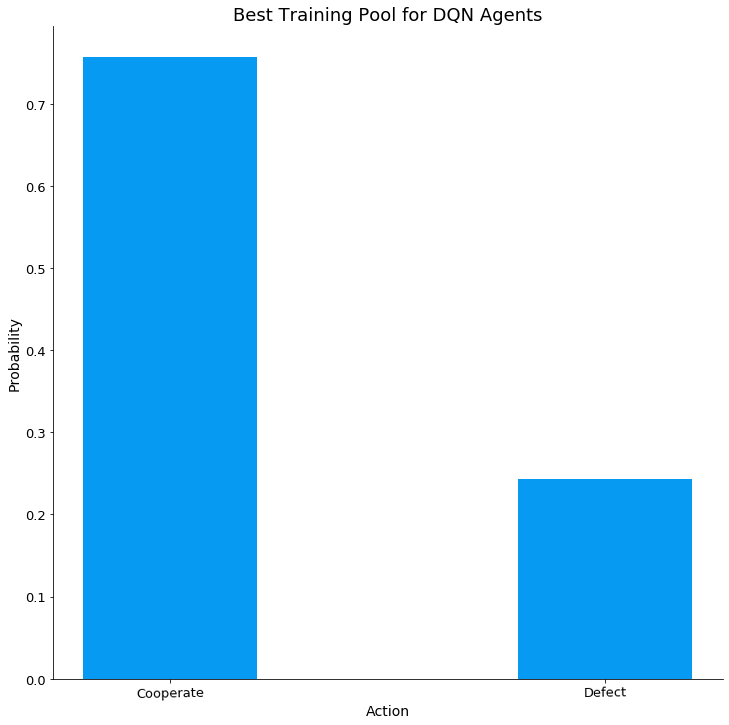

In [27]:
best_dqn = {"Action" : ["Cooperate", "Defect"],
            "Probability" : [
                df_dqn_best_pool1["tr_cooperation_percentage"].sum() / len(df_dqn_best_pool1),
                df_dqn_best_pool1["tr_defection_percentage"].sum() / len(df_dqn_best_pool1)
            ]}
plot_barchart(best_dqn, "Action", "Probability", "Best Training Pool for DQN Agents")
plt.savefig("best_dqn_pool.png")

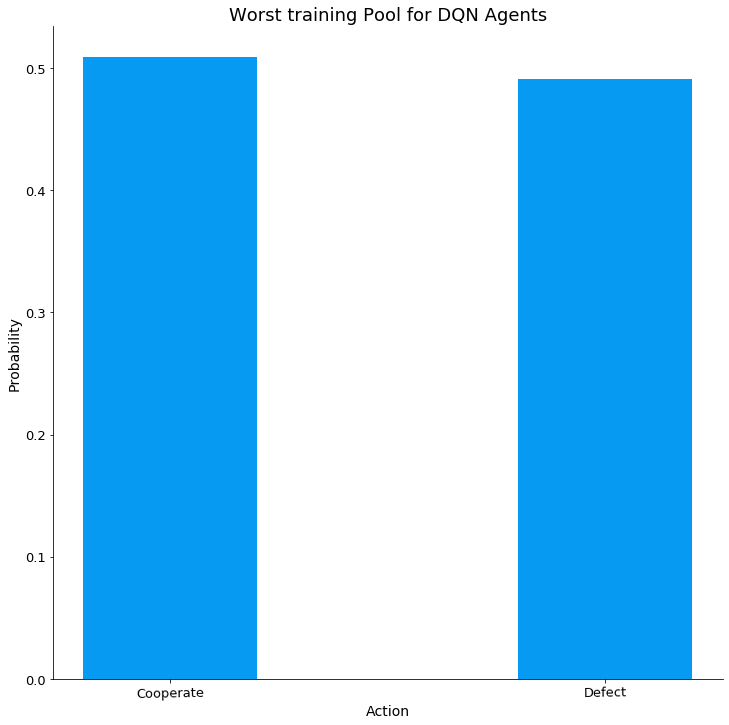

In [31]:
worst_dqn = {"Action" : ["Cooperate", "Defect"],
            "Probability" : [
                df_dqn_worst_pool3["tr_cooperation_percentage"].sum() / len(df_dqn_worst_pool3),
                df_dqn_worst_pool3["tr_defection_percentage"].sum() / len(df_dqn_worst_pool3)
            ]}
plot_barchart(worst_dqn, "Action", "Probability", "Worst training Pool for DQN Agents")
plt.savefig("worst_dqn_pool.png")

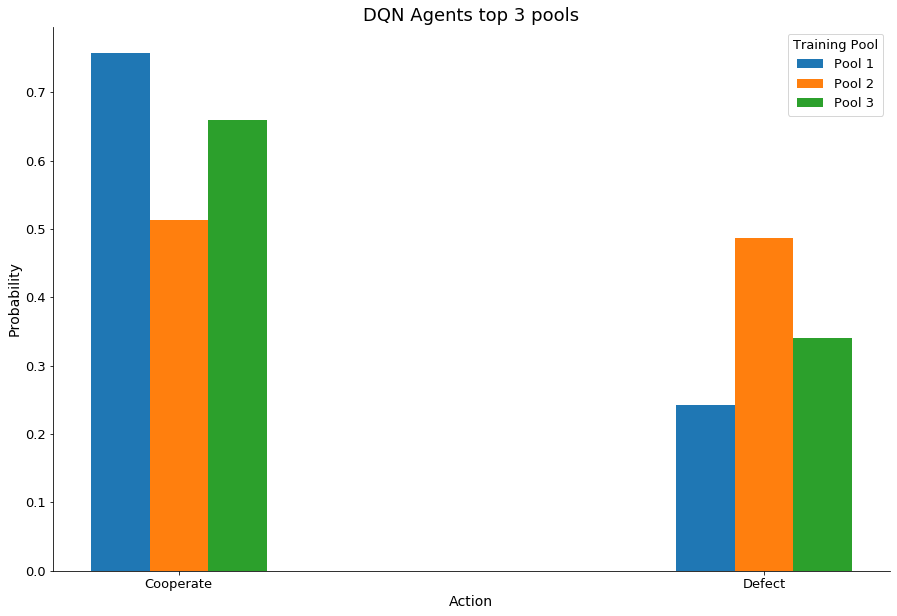

In [24]:
avg_coop_dqnb1 = df_dqn_best_pool1["tr_cooperation_percentage"].sum() / len(df_dqn_best_pool1)
avg_defect_dqnb1 = df_dqn_best_pool1["tr_defection_percentage"].sum() / len(df_dqn_best_pool1)
avg_coop_dqnb2 = df_dqn_best_pool2["tr_cooperation_percentage"].sum() / len(df_dqn_best_pool2)
avg_defect_dqnb2 = df_dqn_best_pool2["tr_defection_percentage"].sum() / len(df_dqn_best_pool2)
avg_coop_dqnb3 = df_dqn_best_pool3["tr_cooperation_percentage"].sum() / len(df_dqn_best_pool3)
avg_defect_dqnb3 = df_dqn_best_pool3["tr_defection_percentage"].sum() / len(df_dqn_best_pool3)

avg_coop_dqnw1 = df_dqn_worst_pool1["tr_cooperation_percentage"].sum() / len(df_dqn_worst_pool1)
avg_defect_dqnw1 = df_dqn_worst_pool1["tr_defection_percentage"].sum() / len(df_dqn_worst_pool1)
avg_coop_dqnw2 = df_dqn_worst_pool2["tr_cooperation_percentage"].sum() / len(df_dqn_worst_pool2)
avg_defect_dqnw2 = df_dqn_worst_pool2["tr_defection_percentage"].sum() / len(df_dqn_worst_pool2)
avg_coop_dqnw3 = df_dqn_worst_pool3["tr_cooperation_percentage"].sum() / len(df_dqn_worst_pool3)
avg_defect_dqnw3 = df_dqn_worst_pool3["tr_defection_percentage"].sum() / len(df_dqn_worst_pool3)

cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.1, [avg_coop_dqnb1, avg_defect_dqnb1], 0.1, label="Pool 1")
plt.bar(x_axis, [avg_coop_dqnb2, avg_defect_dqnb2], 0.1, label="Pool 2")
plt.bar(x_axis + 0.1, [avg_coop_dqnb3, avg_defect_dqnb3], 0.1, label="Pool 3")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("DQN Agents top 3 pools")
plt.legend(title="Training Pool")
plt.savefig("top3pooldqn.png")

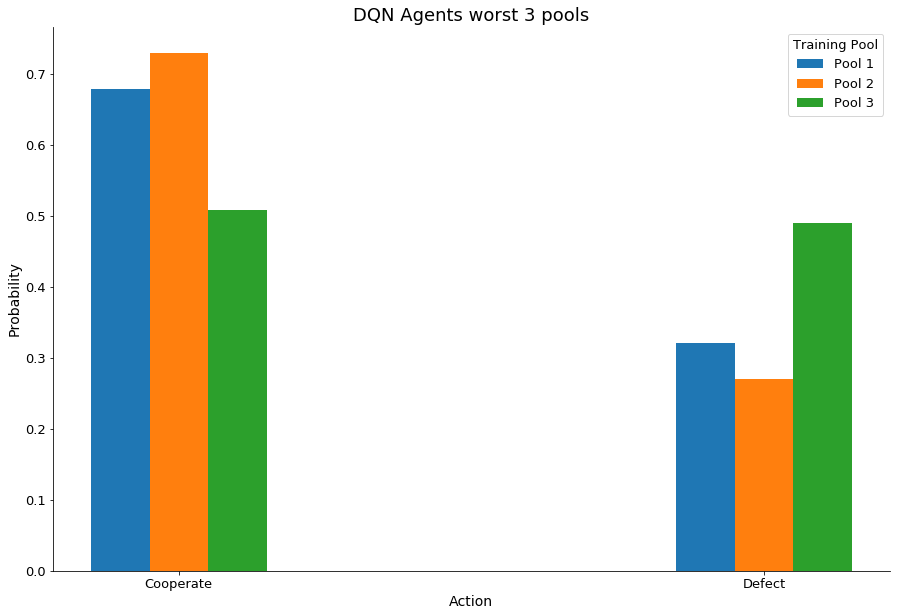

In [25]:
cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.1, [avg_coop_dqnw1, avg_defect_dqnw1], 0.1, label="Pool 1")
plt.bar(x_axis, [avg_coop_dqnw2, avg_defect_dqnw2], 0.1, label="Pool 2")
plt.bar(x_axis + 0.1, [avg_coop_dqnw3, avg_defect_dqnw3], 0.1, label="Pool 3")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("DQN Agents worst 3 pools")
plt.legend(title="Training Pool")
plt.savefig("worst3pooldqn.png")

In [26]:
tabular_pool = calc_pool_avg_rank_count(df_tabular)
tabular_pool = sorted(tabular_pool, key=lambda x: x[1])
for pool in tabular_pool:
    print(f"Pool: {pool[0]},\nAvg Rank: {pool[1]},\nCount: {pool[2]}\n")

Pool: ['TitForTat', 'Nydegger', 'TidemanAndChieruzzi', 'Champion', 'Borufsen', 'SecondByGraaskampKatzen', 'Grofman', 'Leyvraz'],
Avg Rank: 12.861538461538462,
Count: 65

Pool: ['TitForTat', 'TidemanAndChieruzzi', 'Champion', 'Borufsen', 'SecondByGraaskampKatzen', 'Grofman'],
Avg Rank: 22.125,
Count: 16

Pool: ['TitForTat', 'OmegaTFT', 'TFTT', 'TTFT', 'GradualTFT', 'GenerousTFT'],
Avg Rank: 22.537037037037038,
Count: 54

Pool: ['TitForTat', 'Nydegger', 'TidemanAndChieruzzi', 'Borufsen', 'SecondByGraaskampKatzen', 'Grofman'],
Avg Rank: 23.2,
Count: 10

Pool: ['TitForTat'],
Avg Rank: 23.227777777777778,
Count: 180

Pool: ['AllC', 'AllD', 'TitForTat', 'RandomAgent', 'Davis', 'Shubik', 'SteinAndRapoport', 'Grudger', 'Nydegger', 'Grofman', 'Downing', 'Feld', 'Joss', 'Pavlov', 'OmegaTFT', 'TFTT', 'TTFT', 'GradualTFT', 'GenerousTFT', 'TidemanAndChieruzzi', 'Champion', 'Borufsen', 'Leyvraz', 'SecondByHarrington', 'SecondByWhiteK72R', 'SecondByBlackK83R', 'SecondByTidemanAndChieruzzi', 'SecondBy

In [25]:
df_tab_best_pool1 = df_pool(df_tabular, ['TitForTat', 'Nydegger', 'TidemanAndChieruzzi', 'Champion', 'Borufsen', 'SecondByGraaskampKatzen', 'Grofman', 'Leyvraz'])
df_tab_best_pool2 = df_pool(df_tabular, ['TitForTat', 'TidemanAndChieruzzi', 'Champion', 'Borufsen', 'SecondByGraaskampKatzen', 'Grofman'])
df_tab_best_pool3 = df_pool(df_tabular, ['TitForTat', 'OmegaTFT', 'TFTT', 'TTFT', 'GradualTFT', 'GenerousTFT'])

df_tab_worst_pool3 = df_pool(df_tabular, ['TitForTat'])
df_tab_worst_pool2 = df_pool(df_tabular, ['Nydegger', 'Downing', 'TidemanAndChieruzzi', 'Champion', 'Borufsen', 'SecondByGraaskampKatzen'])
df_tab_worst_pool1 = df_pool(df_tabular, ['TitForTat', 'Nydegger', 'Champion', 'Borufsen', 'SecondByGraaskampKatzen'])

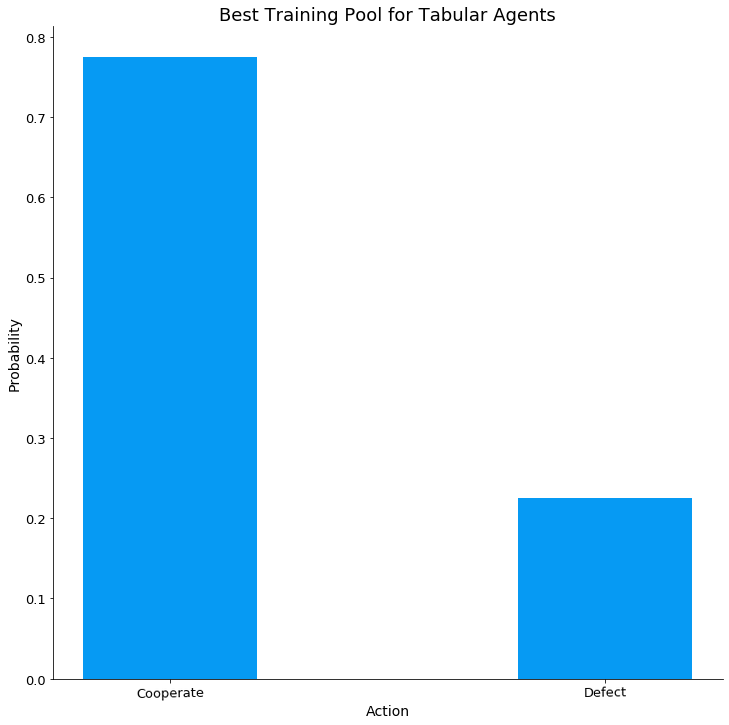

In [28]:
best_tab = {"Action" : ["Cooperate", "Defect"],
            "Probability" : [
                df_tab_best_pool1["tr_cooperation_percentage"].sum() / len(df_tab_best_pool1),
                df_tab_best_pool1["tr_defection_percentage"].sum() / len(df_tab_best_pool1)
            ]}
plot_barchart(best_tab, "Action", "Probability", "Best Training Pool for Tabular Agents")
plt.savefig("best_tab_pool.png")

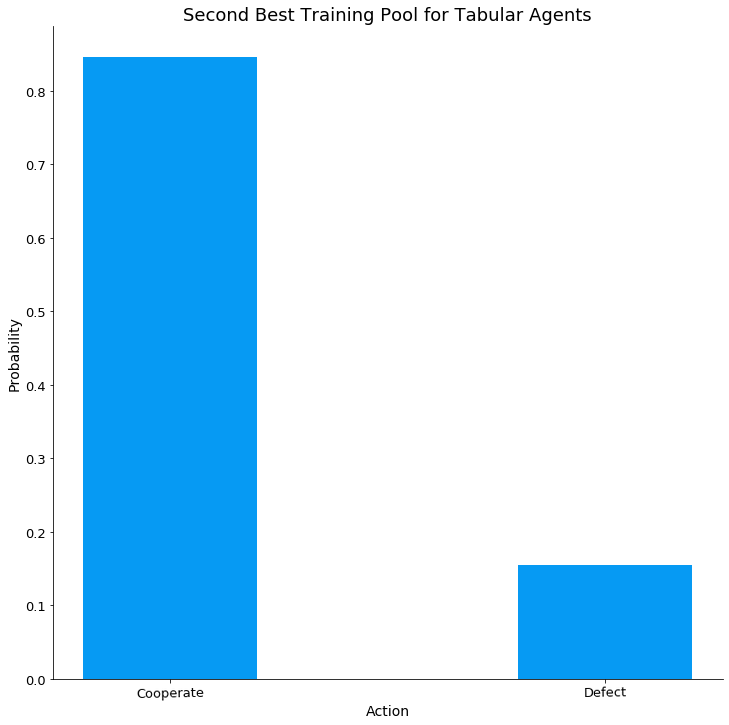

In [32]:
best_tab2 = {"Action" : ["Cooperate", "Defect"],
            "Probability" : [
                df_tab_best_pool2["tr_cooperation_percentage"].sum() / len(df_tab_best_pool2),
                df_tab_best_pool2["tr_defection_percentage"].sum() / len(df_tab_best_pool2)
            ]}
plot_barchart(best_tab2, "Action", "Probability", "Second Best Training Pool for Tabular Agents")
plt.savefig("best_tab_pool2.png")

In [35]:
best_tab["Probability"][0] - best_tab2["Probability"][0]

-0.07128933173076923

In [34]:
best_tab2["Probability"]

[0.8457934375, 0.15420656249999995]

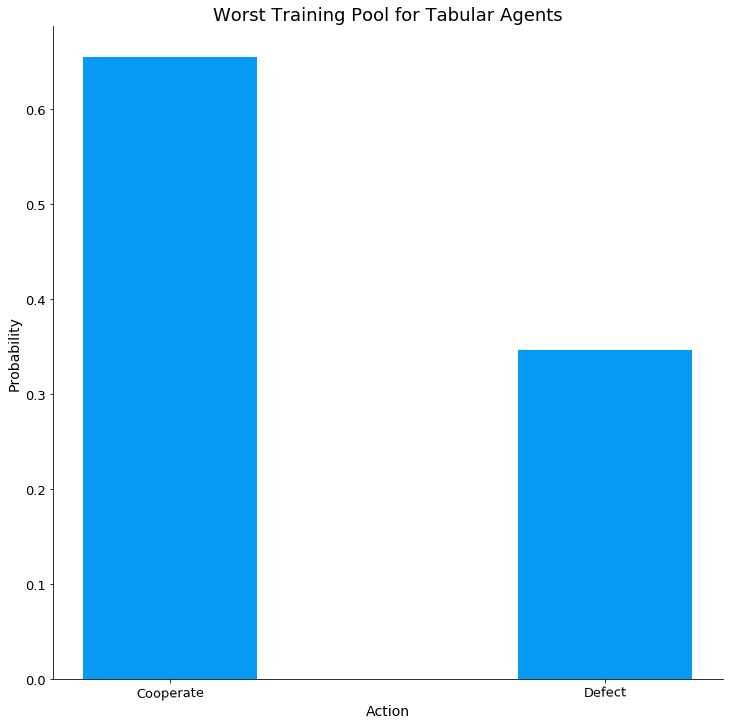

In [30]:
worst_tab = {"Action" : ["Cooperate", "Defect"],
            "Probability" : [
                df_tab_worst_pool1["tr_cooperation_percentage"].sum() / len(df_tab_worst_pool1),
                df_tab_worst_pool1["tr_defection_percentage"].sum() / len(df_tab_worst_pool1)
            ]}
plot_barchart(worst_tab, "Action", "Probability", "Worst Training Pool for Tabular Agents")
plt.savefig("worst_tab_pool.png")

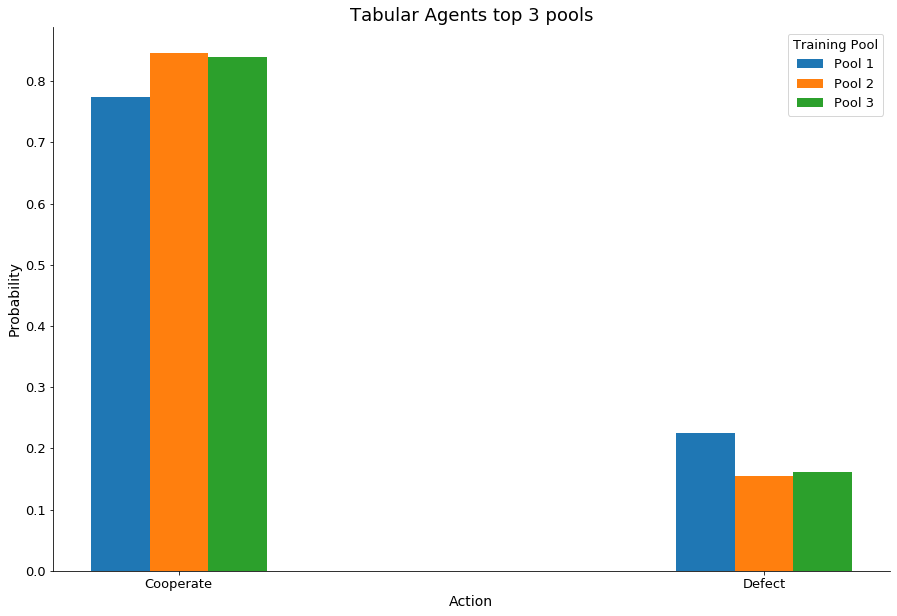

In [28]:
avg_coop_tabb1 = df_tab_best_pool1["tr_cooperation_percentage"].sum() / len(df_tab_best_pool1)
avg_defect_tabb1 = df_tab_best_pool1["tr_defection_percentage"].sum() / len(df_tab_best_pool1)
avg_coop_tabb2 = df_tab_best_pool2["tr_cooperation_percentage"].sum() / len(df_tab_best_pool2)
avg_defect_tabb2 = df_tab_best_pool2["tr_defection_percentage"].sum() / len(df_tab_best_pool2)
avg_coop_tabb3 = df_tab_best_pool3["tr_cooperation_percentage"].sum() / len(df_tab_best_pool3)
avg_defect_tabb3 = df_tab_best_pool3["tr_defection_percentage"].sum() / len(df_tab_best_pool3)

avg_coop_tabw1 = df_tab_worst_pool1["tr_cooperation_percentage"].sum() / len(df_tab_worst_pool1)
avg_defect_tabw1 = df_tab_worst_pool1["tr_defection_percentage"].sum() / len(df_tab_worst_pool1)
avg_coop_tabw2 = df_tab_worst_pool2["tr_cooperation_percentage"].sum() / len(df_tab_worst_pool2)
avg_defect_tabw2 = df_tab_worst_pool2["tr_defection_percentage"].sum() / len(df_tab_worst_pool2)
avg_coop_tabw3 = df_tab_worst_pool3["tr_cooperation_percentage"].sum() / len(df_tab_worst_pool3)
avg_defect_tabw3 = df_tab_worst_pool3["tr_defection_percentage"].sum() / len(df_tab_worst_pool3)

cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.1, [avg_coop_tabb1, avg_defect_tabb1], 0.1, label="Pool 1")
plt.bar(x_axis, [avg_coop_tabb2, avg_defect_tabb2], 0.1, label="Pool 2")
plt.bar(x_axis + 0.1, [avg_coop_tabb3, avg_defect_tabb3], 0.1, label="Pool 3")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents top 3 pools")
plt.legend(title="Training Pool")
plt.savefig("top3pooltab.png")

In [29]:
df_tab_best_pool1[df_tab_best_pool1["tn_rank"] == 2]

,ModelType,agents,decay_limit,discount_rate,epsilon,epsilon_decay,hidden_size,learning_rate,lookback,n1,...,num_layers,tn_mean_score,tn_mean_time,tn_rank,tr_cooperation_percentage,tr_cumul_regret,tr_cumul_reward,tr_defection_percentage,tr_final_loss,tr_mean_reward
42,NaN,"[TitForTat, Nydegger, TidemanAndChieruzzi, Cha...",NaN,0.99,0.01,0.0,NaN,0.1,1.0,NaN,...,NaN,656.579032,4.503664,2.0,0.771486,592313.0,4207687.0,0.228514,NaN,2.629804


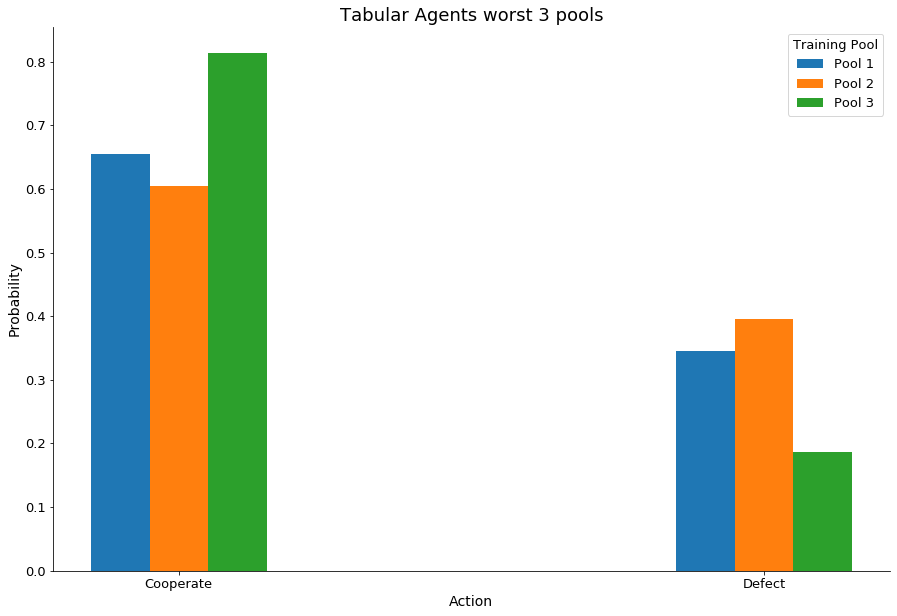

In [30]:
cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.1, [avg_coop_tabw1, avg_defect_tabw1], 0.1, label="Pool 1")
plt.bar(x_axis, [avg_coop_tabw2, avg_defect_tabw2], 0.1, label="Pool 2")
plt.bar(x_axis + 0.1, [avg_coop_tabw3, avg_defect_tabw3], 0.1, label="Pool 3")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents worst 3 pools")
plt.legend(title="Training Pool")
plt.savefig("worst3pooltab.png")

In [31]:
df_dqn.columns

Index(['ModelType', 'agents', 'decay_limit', 'discount_rate', 'epsilon',
       'epsilon_decay', 'hidden_size', 'learning_rate', 'lookback', 'n1', 'n2',
       'num_layers', 'tn_mean_score', 'tn_mean_time', 'tn_rank',
       'tr_cooperation_percentage', 'tr_cumul_regret', 'tr_cumul_reward',
       'tr_defection_percentage', 'tr_final_loss', 'tr_mean_reward'],
      dtype='object')

In [32]:
dqn_n1 = df_dqn["n1"].value_counts().to_dict()
dqn_n1_rank_avgs = {}
for key, val in dqn_n1.items():
    dqn_n1_rank_avgs[key] = df_dqn[df_dqn["n1"] == key]["tn_rank"].sum() / val
dqn_n1_rank_avgs

{4.0: 24.228840125391848,
 8.0: 24.65273311897106,
 16.0: 23.990353697749196,
 32.0: 23.307692307692307,
 64.0: 23.117424242424242,
 128.0: 22.92337164750958,
 12.0: 24.240506329113924,
 24.0: 23.758064516129032,
 20.0: 25.0}

In [33]:
df_dqn[df_dqn["n1"] == 128]["n2"].value_counts()

Series([], Name: n2, dtype: int64)

In [34]:
dqn_n2 = df_dqn["n2"].value_counts().to_dict()
dqn_n2_rank_avgs = {}
for key, val in dqn_n2.items():
    dqn_n2_rank_avgs[key] = df_dqn[df_dqn["n2"] == key]["tn_rank"].sum() / val
dqn_n2_rank_avgs

{8.0: 24.464285714285715,
 12.0: 23.910714285714285,
 16.0: 24.196428571428573,
 24.0: 24.053571428571427,
 4.0: 23.583333333333332,
 32.0: 23.541666666666668}

<h2><center>How does each hyperparameter affect model performance?</center></h2>

<h3><center>1. Epsilon</center></h3>

In [35]:
df["epsilon"].value_counts()

0.20    1373
0.10    1294
0.05     585
0.01     311
0.30     216
0.15      12
0.25       1
Name: epsilon, dtype: int64

In [36]:
# wont use 0.25 since there is only 1 run. Not incredibly reliable.
df_epsil_01 = df[df["epsilon"] == 0.01]
df_epsil_05 = df[df["epsilon"] == 0.05]
df_epsil_10 = df[df["epsilon"] == 0.1]
df_epsil_15 = df[df["epsilon"] == 0.15]
df_epsil_20 = df[df["epsilon"] == 0.2]
df_epsil_30 = df[df["epsilon"] == 0.30]

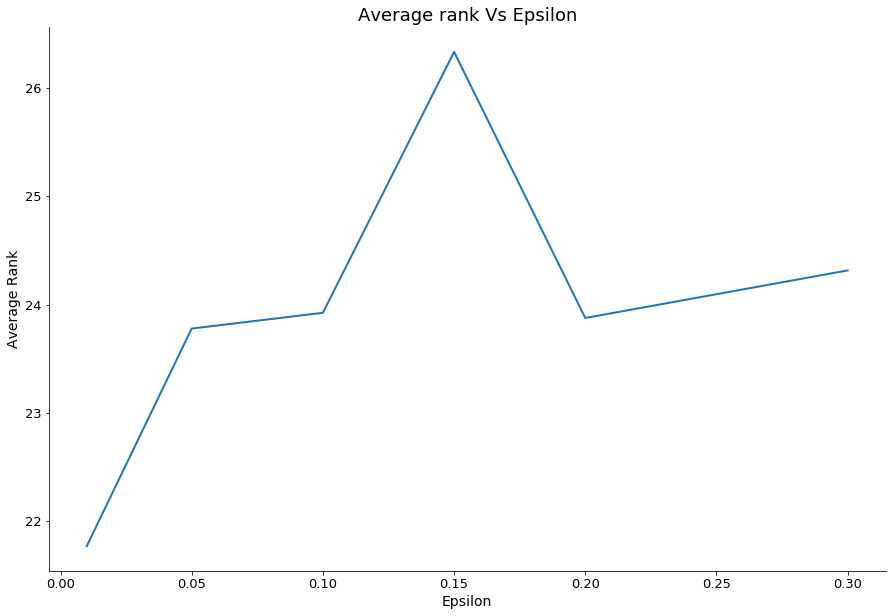

In [37]:
avg_epsil_all = {
    "Epsilon" : [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    "Average Rank" : [
        df_epsil_01["tn_rank"].sum() / len(df_epsil_01),
        df_epsil_05["tn_rank"].sum() / len(df_epsil_05),
        df_epsil_10["tn_rank"].sum() / len(df_epsil_10),
        df_epsil_15["tn_rank"].sum() / len(df_epsil_15),
        df_epsil_20["tn_rank"].sum() / len(df_epsil_20),
        df_epsil_30["tn_rank"].sum() / len(df_epsil_30),
    ]
}

plot_linegraph(avg_epsil_all, "Epsilon", "Average Rank", "Average rank Vs Epsilon")

<h4>Epsilon value of 0.01 performs the best; this is surprising. Lets investigate it further.</h4>

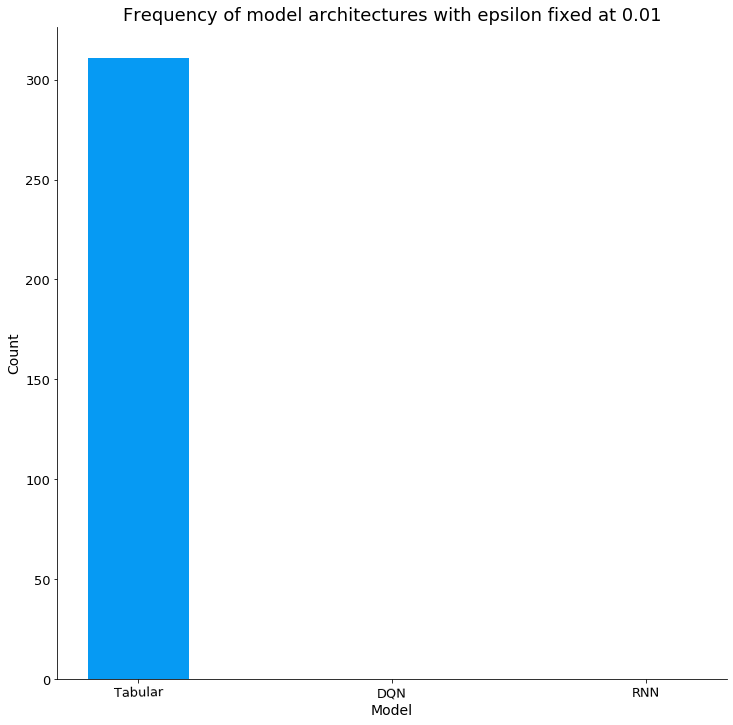

In [38]:
epsil_01_dist = {
    "Model" : ["Tabular", "DQN", "RNN"],
    "Count" : [
        len(df_epsil_01[pd.isnull(df_epsil_01["ModelType"])]),
        len(df_epsil_01[df_epsil_01["ModelType"] == "DQN"]),
        len(df_epsil_01[df_epsil_01["ModelType"] == "RNN"])
    ]
}

plot_barchart(epsil_01_dist, "Model", "Count", "Frequency of model architectures with epsilon fixed at 0.01")

<h4>This explains our result from earlier. Tabular learners had the lowest average rank out of all models. Therefore, as all of the models that ran a grid search with epsilon = 0.01 are tabular, the average rank for the epsilon value of 0.01 is lower.</h4>

<h4>To confirm this hypothesis, I will now investigate the effect of epsilon on both DQN and tabular learners.</h4>

In [39]:
df_tabular["epsilon"].value_counts()

0.10    680
0.20    613
0.01    311
0.30    216
0.05     78
Name: epsilon, dtype: int64

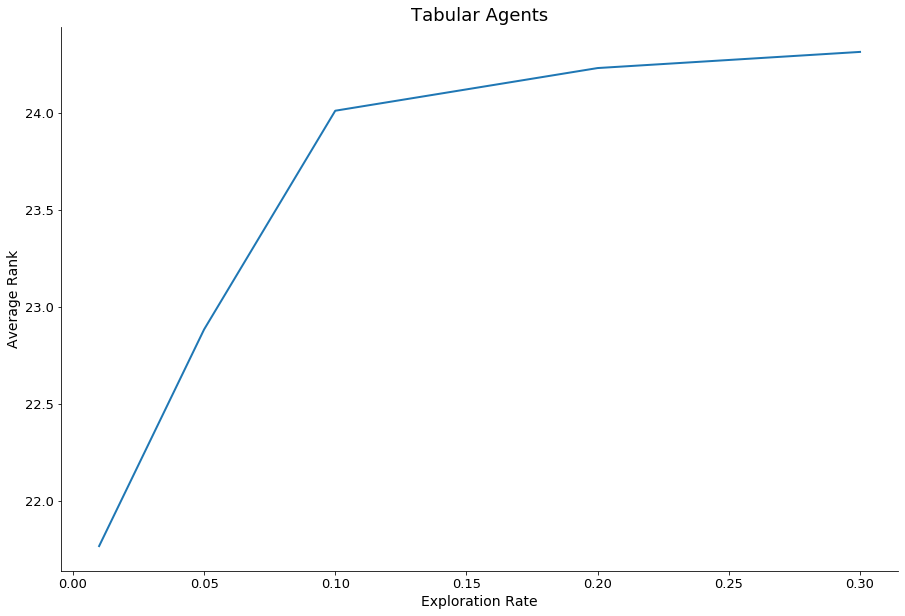

In [40]:
df_tab_epsil_01 = df_tabular[df_tabular["epsilon"] == 0.01]
df_tab_epsil_05 = df_tabular[df_tabular["epsilon"] == 0.05]
df_tab_epsil_10 = df_tabular[df_tabular["epsilon"] == 0.1]
df_tab_epsil_20 = df_tabular[df_tabular["epsilon"] == 0.2]
df_tab_epsil_30 = df_tabular[df_tabular["epsilon"] == 0.3]

avg_epsil_tab = {
    "Exploration Rate" : [0.01, 0.05, 0.1, 0.2, 0.3],
    "Average Rank" : [
        df_tab_epsil_01["tn_rank"].sum() / len(df_tab_epsil_01),
        df_tab_epsil_05["tn_rank"].sum() / len(df_tab_epsil_05),
        df_tab_epsil_10["tn_rank"].sum() / len(df_tab_epsil_10),
        df_tab_epsil_20["tn_rank"].sum() / len(df_tab_epsil_20),
        df_tab_epsil_30["tn_rank"].sum() / len(df_tab_epsil_30),
    ]
}

plot_linegraph(avg_epsil_tab, "Exploration Rate", "Average Rank", "Tabular Agents")
plt.savefig("rankvsexploration_tab.png")

In [41]:
df_dqn["epsilon"].value_counts()

0.20    760
0.10    614
0.05    507
0.15     12
0.25      1
Name: epsilon, dtype: int64

<h4>We wont use epsilon values of 0.15 and 0.25 since the number of runs is quite low.</h4>

C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


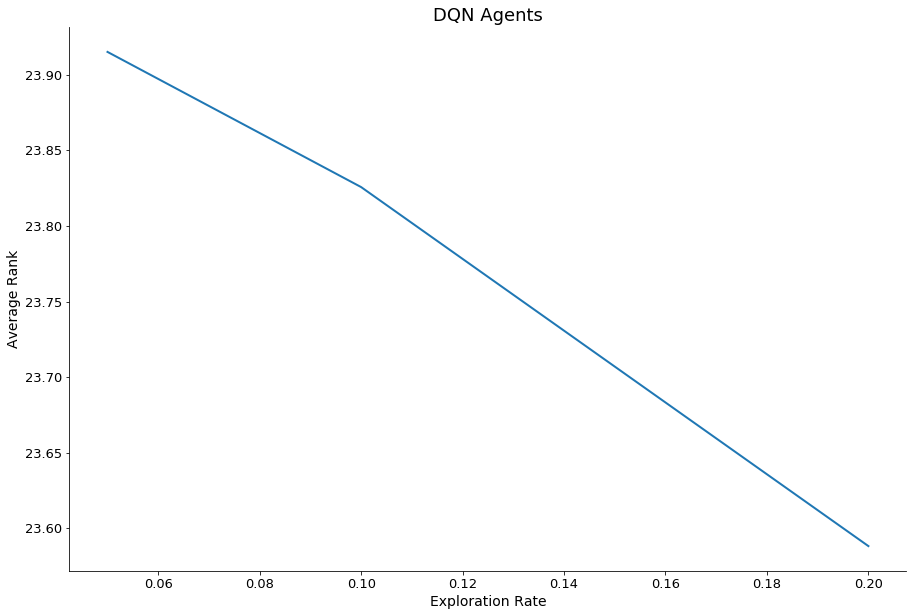

In [42]:
df_dqn_epsil_05 = df_dqn[df_dqn["epsilon"] == 0.05]
df_dqn_epsil_10 = df_dqn[df_dqn["epsilon"] == 0.1]
df_dqn_epsil_20 = df_dqn[df_dqn["epsilon"] == 0.2]
df_dqn_epsil_30 = df_dqn[df_dqn["epsilon"] == 0.3]

avg_epsil_dqn = {
    "Exploration Rate" : [0.05, 0.1, 0.2, 0.3],
    "Average Rank" : [
        df_dqn_epsil_05["tn_rank"].sum() / len(df_dqn_epsil_05),
        df_dqn_epsil_10["tn_rank"].sum() / len(df_dqn_epsil_10),
        df_dqn_epsil_20["tn_rank"].sum() / len(df_dqn_epsil_20),
        df_dqn_epsil_30["tn_rank"].sum() / len(df_dqn_epsil_30),
    ]
}

plot_linegraph(avg_epsil_dqn, "Exploration Rate", "Average Rank", "DQN Agents")
plt.savefig("rankvsexploration_dqn.png")

<h4>The resulting graph for DQN agents is as expected, more exploration would lead to the agent learning better strategies. On the other hand, the graph for tabular learners is unexpected; it seems as though the Q-Learning agent learns the optimal strategy from the start.</h4>

<h3><center>2. Look back</center></h3>

In [43]:
df["lookback"].value_counts()

8.0     785
4.0     750
1.0     729
2.0     619
10.0    573
6.0     318
5.0      18
Name: lookback, dtype: int64

<h4>We will ignore the lookback of 5 due to the low number of results.</h4>

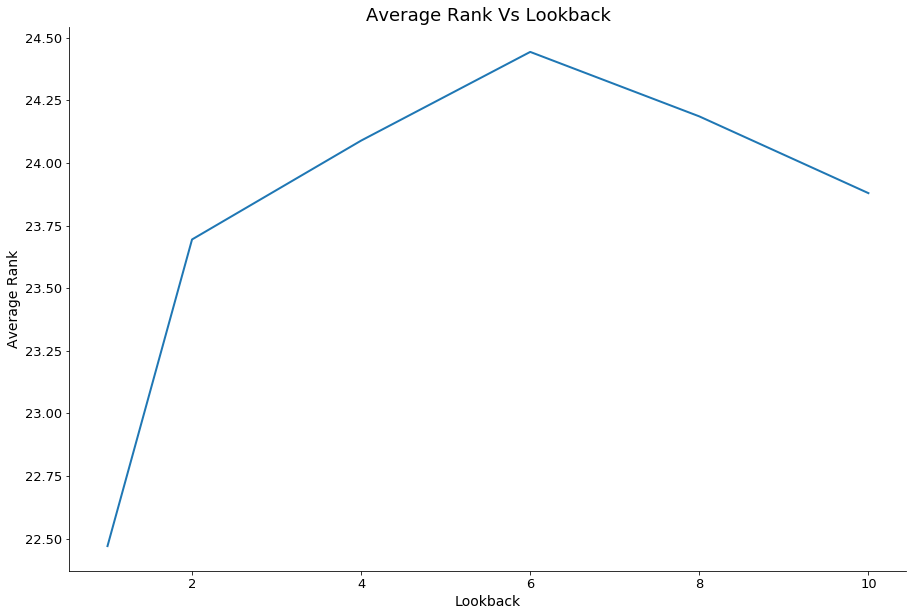

In [44]:
df_lb_1 = df[df["lookback"] == 1]
df_lb_2 = df[df["lookback"] == 2]
df_lb_4 = df[df["lookback"] == 4]
df_lb_6 = df[df["lookback"] == 6]
df_lb_8 = df[df["lookback"] == 8]
df_lb_10 = df[df["lookback"] == 10]

avg_ranks_lb_all = {
    "Lookback" : [1, 2, 4, 6, 8, 10],
    "Average Rank" : [
        df_lb_1["tn_rank"].sum() / len(df_lb_1),
        df_lb_2["tn_rank"].sum() / len(df_lb_2),
        df_lb_4["tn_rank"].sum() / len(df_lb_4),
        df_lb_6["tn_rank"].sum() / len(df_lb_6),
        df_lb_8["tn_rank"].sum() / len(df_lb_8),
        df_lb_10["tn_rank"].sum() / len(df_lb_10),
    ]
}
plot_linegraph(avg_ranks_lb_all, "Lookback", "Average Rank", "Average Rank Vs Lookback")

<h4>Yet another surprising result. My hypothesis was that the longer the lookback the better the performance of the agent because it would be able to learn more complicated strategies. However, in a game as simple as iterated prisoners dilemma, a lower lookback proves more fruitful.</h4>

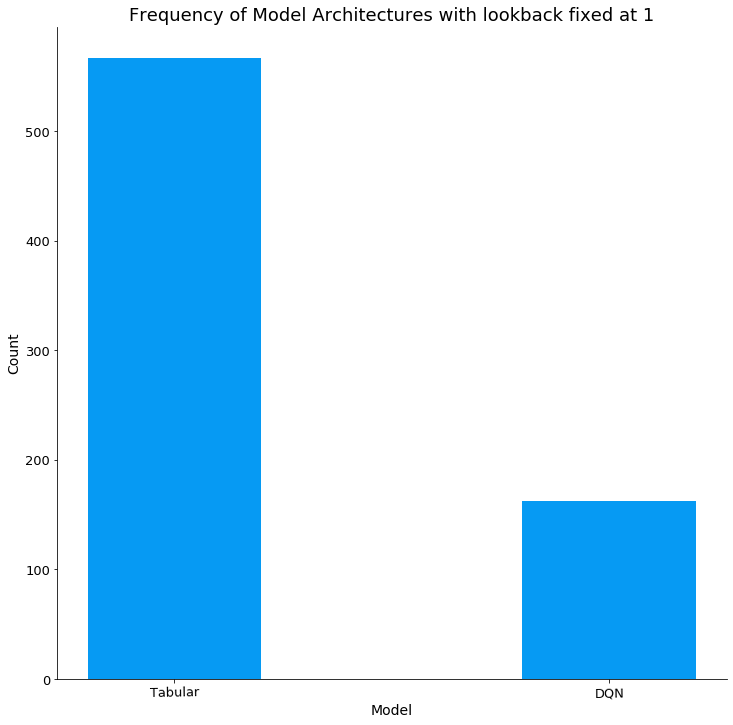

In [45]:
lb_1_dist = {
    "Model" : ["Tabular", "DQN"],
    "Count" : [
        len(df_lb_1[pd.isnull(df_lb_1["ModelType"])]),
        len(df_lb_1[df_lb_1["ModelType"] == "DQN"])
    ]
}

plot_barchart(lb_1_dist, "Model", "Count", "Frequency of Model Architectures with lookback fixed at 1")

<h4>Same reasoning applies here as epsilon.</h4>

In [46]:
df_tabular["lookback"].value_counts()

1.0     567
2.0     342
10.0    290
8.0     284
4.0     277
6.0     120
5.0      18
Name: lookback, dtype: int64

<h4>Discard 5 due to low number of runs.</h4>

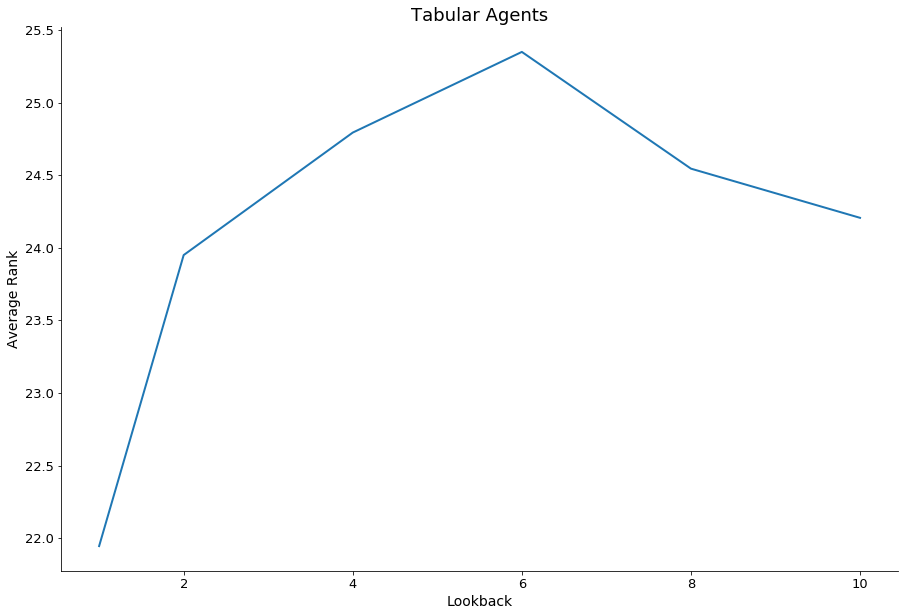

In [47]:
avg_lb_tab = {
    "Lookback" : [1, 2, 4, 6, 8, 10],
    "Average Rank" : [
        df_tabular[df_tabular["lookback"] == 1]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 1]),
        df_tabular[df_tabular["lookback"] == 2]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 2]),
        df_tabular[df_tabular["lookback"] == 4]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 4]),
        df_tabular[df_tabular["lookback"] == 6]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 6]),
        df_tabular[df_tabular["lookback"] == 8]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 8]),
        df_tabular[df_tabular["lookback"] == 10]["tn_rank"].sum() / len(df_tabular[df_tabular["lookback"] == 10]),
    ]
}

plot_linegraph(avg_lb_tab, "Lookback", "Average Rank", "Tabular Agents")
plt.savefig("lookbackvsrank_tab.png")

<h4>Tabular learners perform best with a lookback of 1.</h4>

In [48]:
df_dqn["lookback"].value_counts()

8.0     501
4.0     473
10.0    283
2.0     277
6.0     198
1.0     162
Name: lookback, dtype: int64

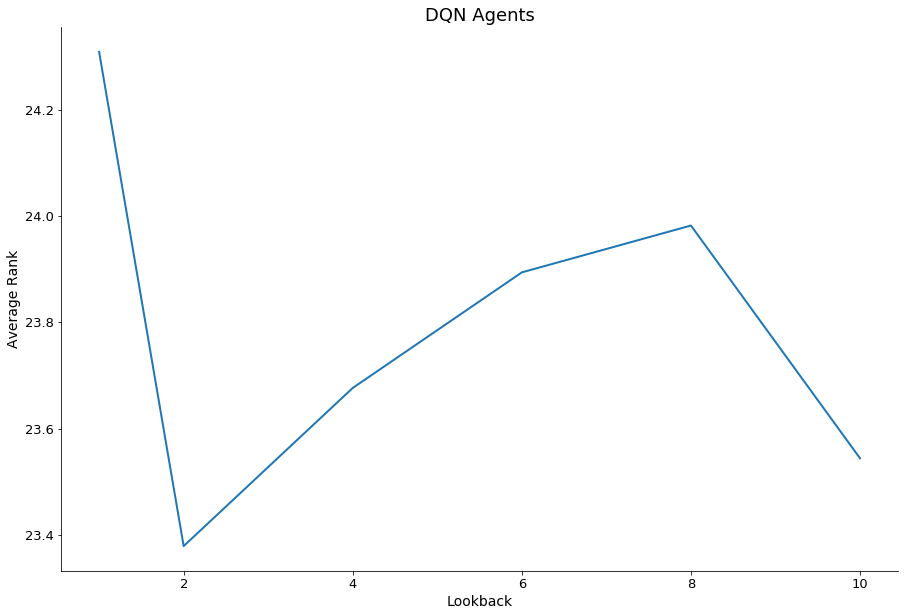

In [49]:
avg_lb_dqn = {
    "Lookback" : [1, 2, 4, 6, 8, 10],
    "Average Rank" : [
        df_dqn[df_dqn["lookback"] == 1]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 1]),
        df_dqn[df_dqn["lookback"] == 2]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 2]),
        df_dqn[df_dqn["lookback"] == 4]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 4]),
        df_dqn[df_dqn["lookback"] == 6]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 6]),
        df_dqn[df_dqn["lookback"] == 8]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 8]),
        df_dqn[df_dqn["lookback"] == 10]["tn_rank"].sum() / len(df_dqn[df_dqn["lookback"] == 10]),
    ]
}

plot_linegraph(avg_lb_dqn, "Lookback", "Average Rank", "DQN Agents")
plt.savefig("rankvslookback_dqn.png")

<h4>DQN agents perform worst with a lookback of 1. Increasing the lookback from 1 -> 2 has the greatest performance boost. Thus, for DQN agents, a lookback of 2 will suffice.</h4>

<h3><center>3. Discount Rate</center></h3>

In [50]:
df["discount_rate"].value_counts()

0.95    2131
0.99    1445
0.90     216
Name: discount_rate, dtype: int64

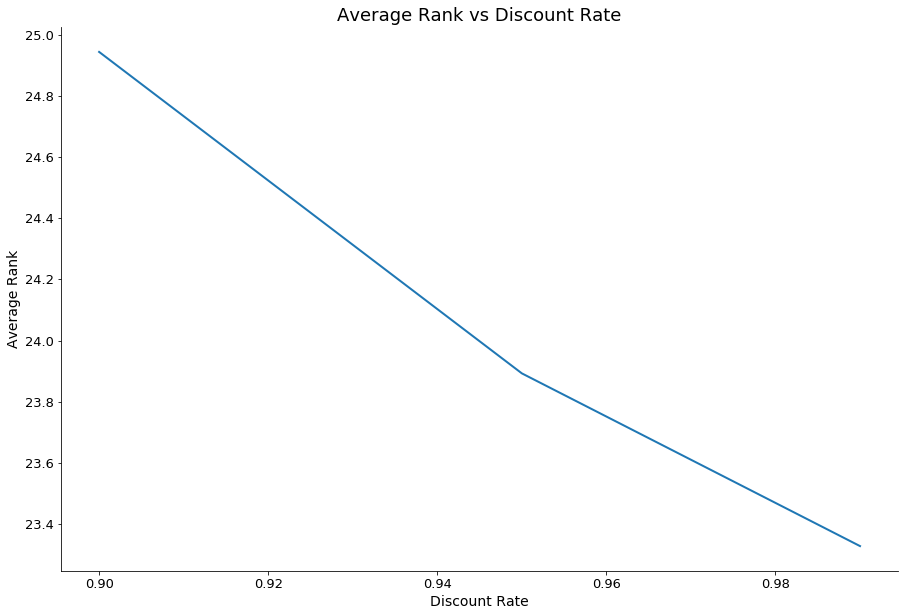

In [51]:
avg_dr_all = {
    "Discount Rate" : [0.9, 0.95, 0.99],
    "Average Rank" : [
        df[df["discount_rate"] == 0.9]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.9]),
        df[df["discount_rate"] == 0.95]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.95]),
        df[df["discount_rate"] == 0.99]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.99]),
    ]
}

plot_linegraph(avg_dr_all, "Discount Rate", "Average Rank", "Average Rank vs Discount Rate")

<h4>This is what we expected to observe. One interpretation of the discount rate is how much each agent values future rewards. As agents start to consider the future more, their ranking starts to improve.</h4>

In [52]:
df_tabular["discount_rate"].value_counts()

0.99    1016
0.95     666
0.90     216
Name: discount_rate, dtype: int64

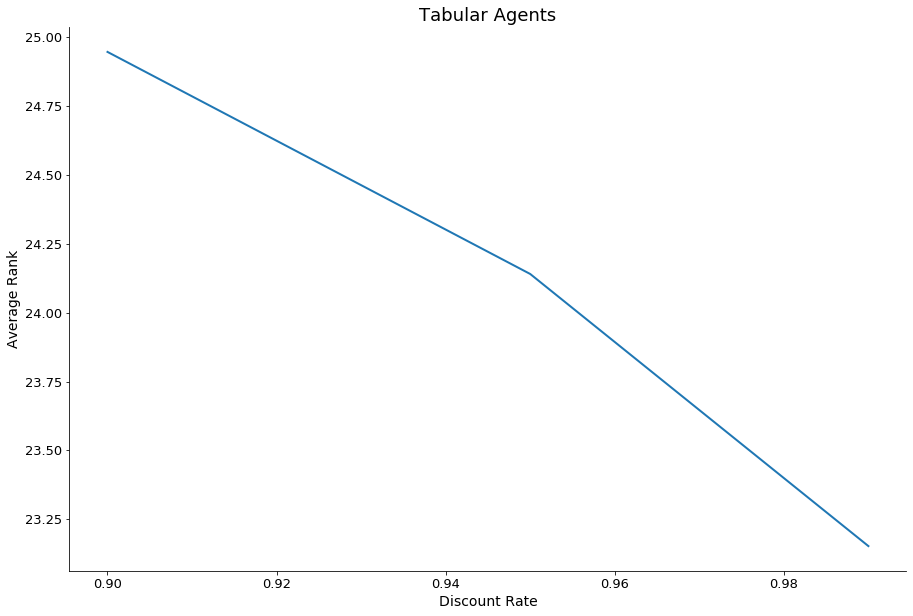

In [53]:
avg_dr_tab = {
    "Discount Rate" : [0.9, 0.95, 0.99],
    "Average Rank" : [
        df_tabular[df_tabular["discount_rate"] == 0.9]["tn_rank"].sum() / len(df_tabular[df_tabular["discount_rate"] == 0.9]),
        df_tabular[df_tabular["discount_rate"] == 0.95]["tn_rank"].sum() / len(df_tabular[df_tabular["discount_rate"] == 0.95]),
        df_tabular[df_tabular["discount_rate"] == 0.99]["tn_rank"].sum() / len(df_tabular[df_tabular["discount_rate"] == 0.99]),
    ]
}

plot_linegraph(avg_dr_tab, "Discount Rate", "Average Rank", "Tabular Agents")
plt.savefig("rankvsdiscount_tab.png")

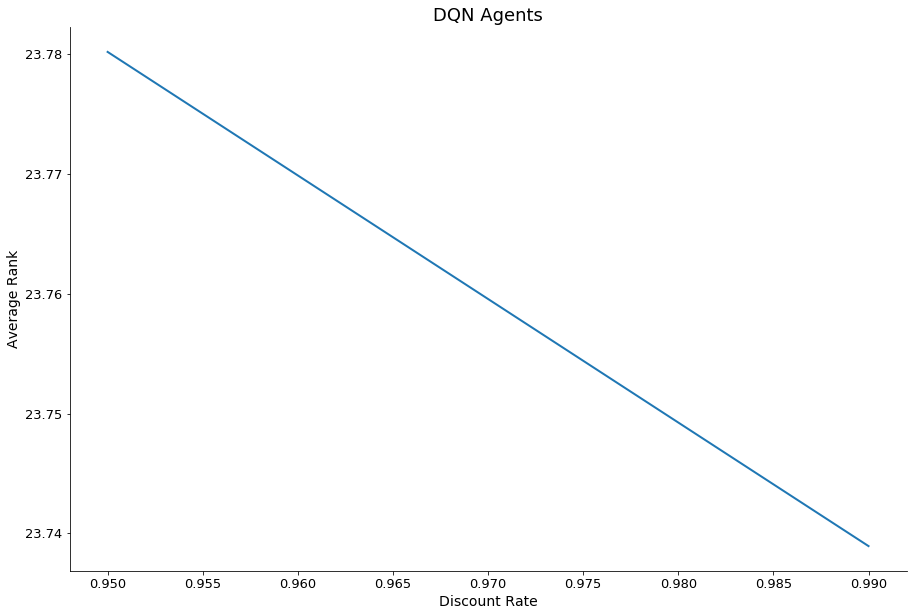

In [54]:
avg_dr_dqn = {
    "Discount Rate" : [0.95, 0.99],
    "Average Rank" : [
        df_dqn[df_dqn["discount_rate"] == 0.95]["tn_rank"].sum() / len(df_dqn[df_dqn["discount_rate"] == 0.95]),
        df_dqn[df_dqn["discount_rate"] == 0.99]["tn_rank"].sum() / len(df_dqn[df_dqn["discount_rate"] == 0.99]),
    ]
}

plot_linegraph(avg_dr_dqn, "Discount Rate", "Average Rank", "DQN Agents")
plt.savefig("rankvsdiscount_dqn.png")

<h4>For both DQN and tabular, the discount value of 0.99 is best.</h4>

<h3><center>4. Learning Rate</center></h3>

In [55]:
df["learning_rate"].value_counts()

0.010    1711
0.001    1296
0.100     751
0.005      24
0.200      10
Name: learning_rate, dtype: int64

<h4>Ignore learning rate of 0.2 due to the low number of runs.</h4>

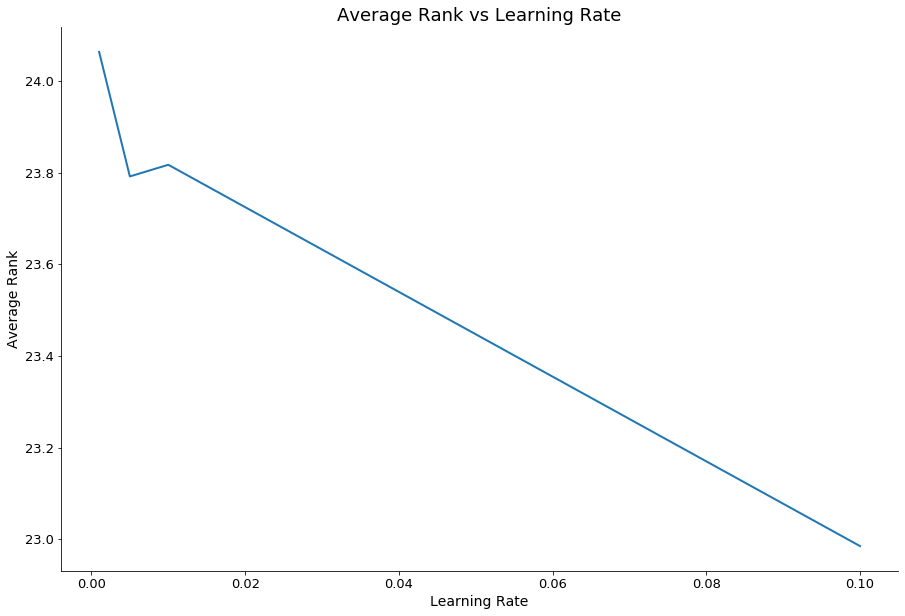

In [56]:
avg_lr_all = {
    "Learning Rate" : [0.001, 0.005, 0.01, 0.1],
    "Average Rank" : [
        df[df["learning_rate"] == 0.001]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.001]),
        df[df["learning_rate"] == 0.005]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.005]),
        df[df["learning_rate"] == 0.01]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.01]),
        df[df["learning_rate"] == 0.1]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.1]),
    ]
}

plot_linegraph(avg_lr_all, "Learning Rate", "Average Rank", "Average Rank vs Learning Rate")

In [57]:
df_tabular["learning_rate"].value_counts()

0.010    781
0.100    751
0.001    356
0.200     10
Name: learning_rate, dtype: int64

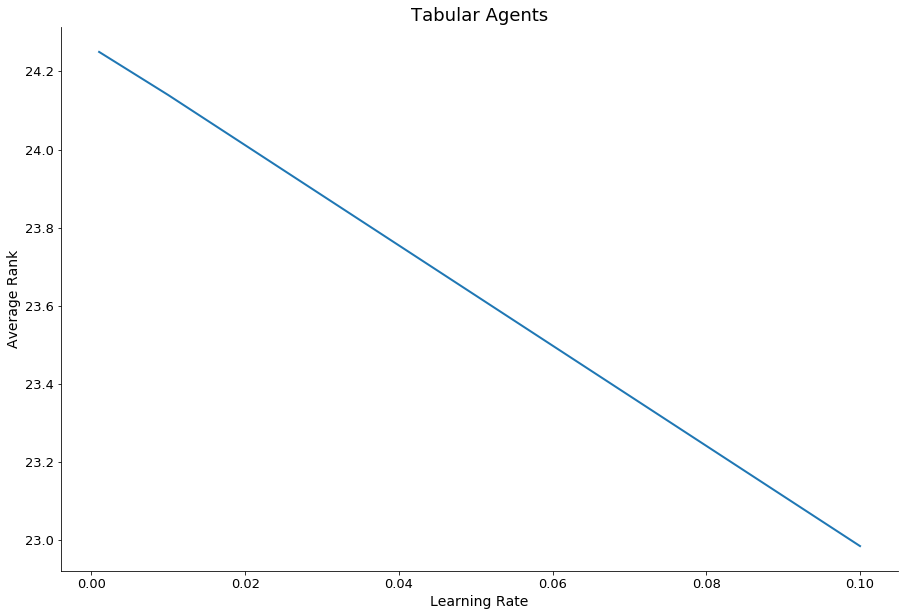

In [58]:
avg_lr_tab = {
    "Learning Rate" : [0.001, 0.01, 0.1],
    "Average Rank" : [
        df_tabular[df_tabular["learning_rate"] == 0.001]["tn_rank"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.001]),
        df_tabular[df_tabular["learning_rate"] == 0.01]["tn_rank"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.01]),
        df_tabular[df_tabular["learning_rate"] == 0.1]["tn_rank"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.1]),        
    ]
}

plot_linegraph(avg_lr_tab, "Learning Rate", "Average Rank", "Tabular Agents")
plt.savefig("rankvslearning_tab.png")

In [59]:
df_dqn["learning_rate"].value_counts()

0.001    940
0.010    930
0.005     24
Name: learning_rate, dtype: int64

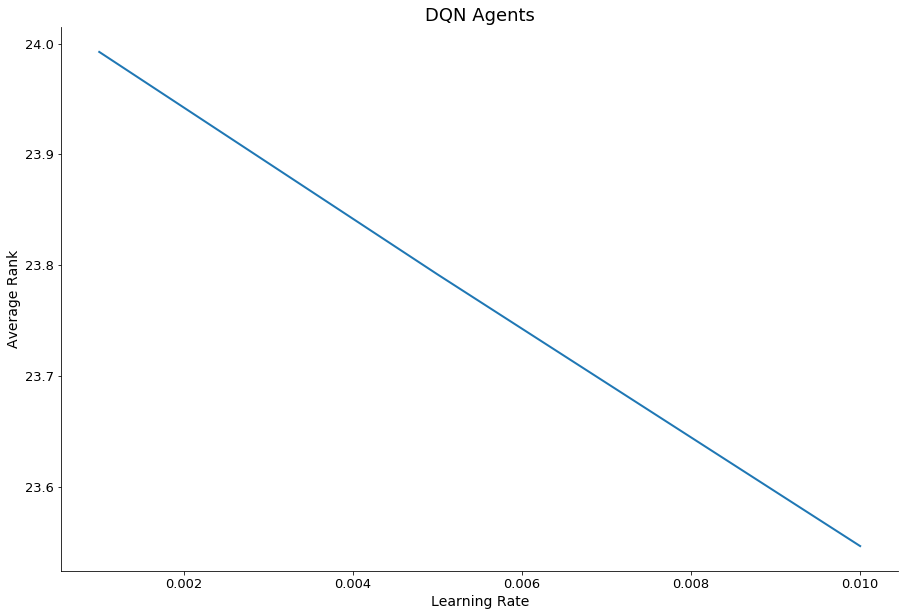

In [60]:
avg_lr_dqn = {
    "Learning Rate" : [0.001, 0.005, 0.01],
    "Average Rank" : [
        df_dqn[df_dqn["learning_rate"] == 0.001]["tn_rank"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.001]),
        df_dqn[df_dqn["learning_rate"] == 0.005]["tn_rank"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.005]),
        df_dqn[df_dqn["learning_rate"] == 0.01]["tn_rank"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.01]),        
    ]
}

plot_linegraph(avg_lr_dqn, "Learning Rate", "Average Rank", "DQN Agents")
plt.savefig("rankvslearning_dqn.png")

<h4>It looks as though the higher the learning rate, the better the performance of both DQN and tabular agents.</h4>

In [61]:
# curious to see avg rank of lr for 0.2
df_tabular[df_tabular["learning_rate"] == 0.2]["tn_rank"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.2])

24.1

<h4>The average rank increases for learning rate of 0.2. We can tentatively conclude that agent performance deteriorates as learning rate is increased past the threshold value of 0.1. In order to verify this hypothesis, more runs would need to be completed with learning rate at 0.2.</h4>

<h2><center>Are the top performing agents predominantly cooperative or defective?</center></h2>

In [62]:
df_top_5 = df[df["tn_rank"] <= 5]
len(df_top_5)

31

In [63]:
df.columns

Index(['ModelType', 'agents', 'decay_limit', 'discount_rate', 'epsilon',
       'epsilon_decay', 'hidden_size', 'learning_rate', 'lookback', 'n1', 'n2',
       'num_layers', 'tn_mean_score', 'tn_mean_time', 'tn_rank',
       'tr_cooperation_percentage', 'tr_cumul_regret', 'tr_cumul_reward',
       'tr_defection_percentage', 'tr_final_loss', 'tr_mean_reward'],
      dtype='object')

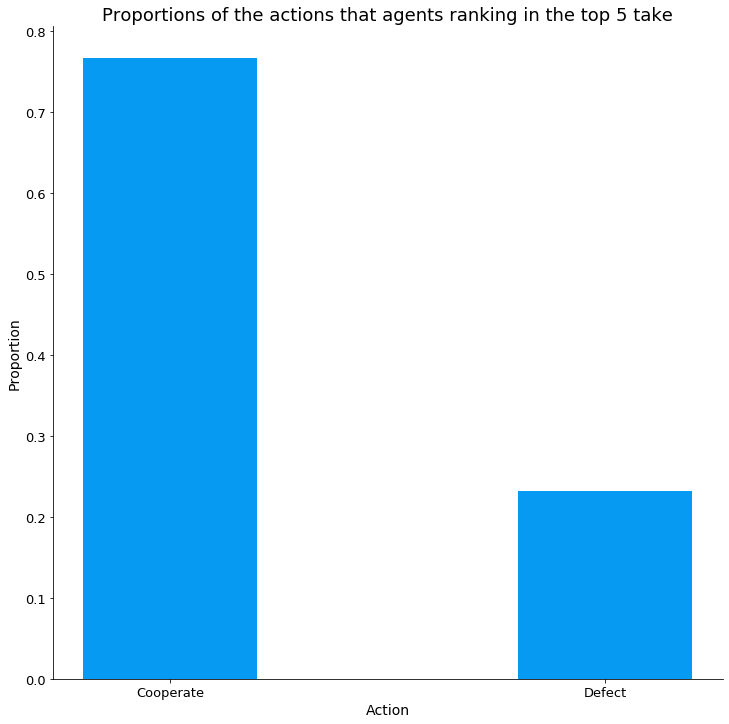

In [64]:
top_5_avg_coop_percent = df_top_5["tr_cooperation_percentage"].sum() / len(df_top_5)
top_5_avg_defect_percent = df_top_5["tr_defection_percentage"].sum() / len(df_top_5)
plot_barchart({"Action" : ["Cooperate", "Defect"], "Proportion" : [top_5_avg_coop_percent, top_5_avg_defect_percent]}, "Action", "Proportion", "Proportions of the actions that agents ranking in the top 5 take", False)

<h4>It looks as though the top performing agents are cooperative. They cooperate almost 80% of the time. This provides evidence that cooperative agents tend to do well in iterated prisoners dilemma. It is important to note that this strategy is not the same as ALL C. These top performing agents do defect as well, suggesting that punishment is another important characteristic of a good agent.</h4>

<h3><center>Does this hold up for tabular and DQN?</center></h3>

In [65]:
df_top_5_tab = df_top_5[pd.isnull(df_top_5["ModelType"])]
df_top_5_dqn = df_top_5[df_top_5["ModelType"] == "DQN"]
print(len(df_top_5_tab))
print(len(df_top_5_dqn))

25
6


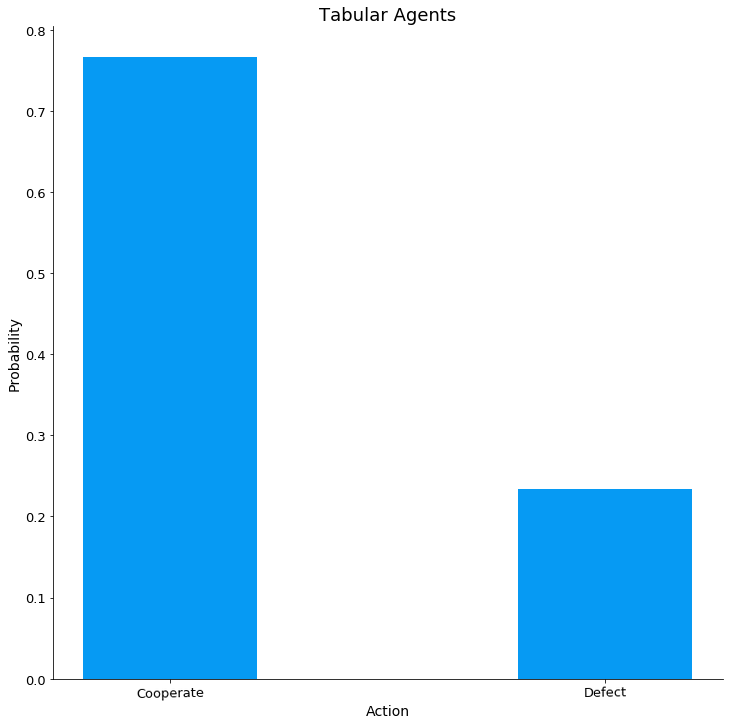

In [66]:
tab_top_5_avg_coop_percent = df_top_5_tab["tr_cooperation_percentage"].sum() / len(df_top_5_tab)
tab_top_5_avg_defect_percent = df_top_5_tab["tr_defection_percentage"].sum() / len(df_top_5_tab)
plot_barchart({"Action" : ["Cooperate", "Defect"], "Probability" : [tab_top_5_avg_coop_percent, tab_top_5_avg_defect_percent]}, "Action", "Probability", "Tabular Agents")
plt.savefig("strategy_top_5_tab.png")

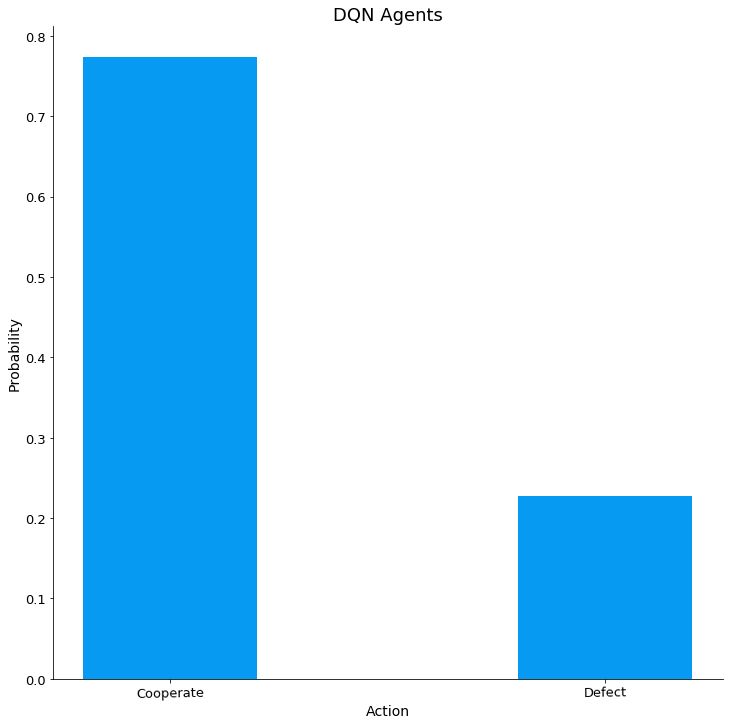

In [67]:
dqn_top_5_avg_coop_percent = df_top_5_dqn["tr_cooperation_percentage"].sum() / len(df_top_5_dqn)
dqn_top_5_avg_defect_percent = df_top_5_dqn["tr_defection_percentage"].sum() / len(df_top_5_dqn)
plot_barchart({"Action" : ["Cooperate", "Defect"], "Probability" : [dqn_top_5_avg_coop_percent, dqn_top_5_avg_defect_percent]}, "Action", "Probability", "DQN Agents")
plt.savefig("strategy_best_5_dqn.png")

<h4>These results are consistent with the overall trend.</h4>

<h2><center>In contrast, are the worst performing agents predominantly cooperative or defective?</center></h2>

In [68]:
df_lt_30 = df[df["tn_rank"] >= 30]
len(df_lt_30)

355

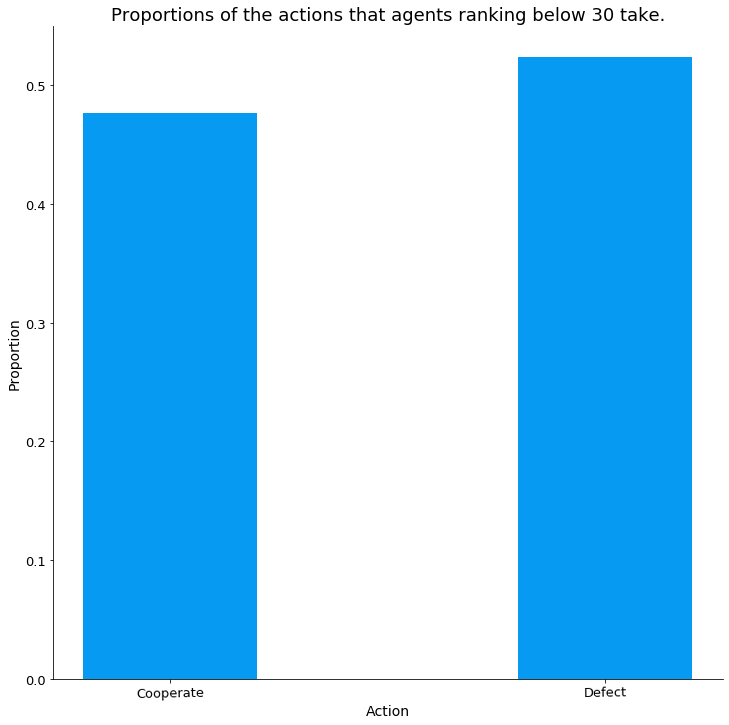

In [69]:
lt_30_avg_coop_percent = df_lt_30["tr_cooperation_percentage"].sum() / len(df_lt_30)
lt_30_avg_defect_percent = df_lt_30["tr_defection_percentage"].sum() / len(df_lt_30)
plot_barchart({"Action" : ["Cooperate", "Defect"], "Proportion" : [lt_30_avg_coop_percent, lt_30_avg_defect_percent]}, "Action", "Proportion", "Proportions of the actions that agents ranking below 30 take.")

<h4>The graph shows that the worst agents play similarly to a random agent but with a slightly higher probability of defection. Therefore, cooperative tendencies lead to a higher ranking while defective agents perform poorly.</h4>

<h3><center>Does this result hold up for tabular and DQN?
   </center></h3>

In [70]:
df_lt_30_tab = df_lt_30[pd.isnull(df_lt_30["ModelType"])]
df_lt_30_dqn = df_lt_30[df_lt_30["ModelType"] == "DQN"]
print(len(df_lt_30_tab))
print(len(df_lt_30_dqn))

216
139


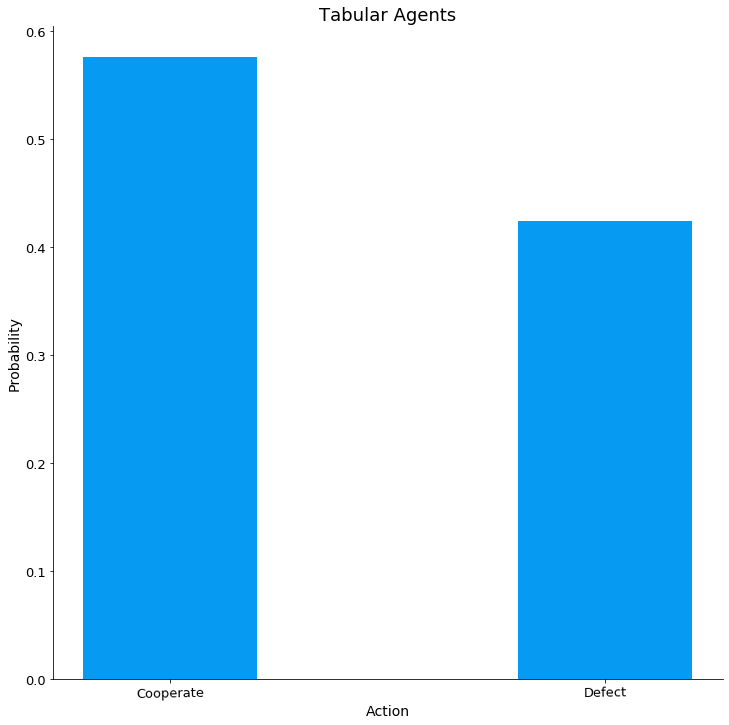

In [71]:
tab_lt_30_avg_coop_percent = df_lt_30_tab["tr_cooperation_percentage"].sum() / len(df_lt_30_tab)
tab_lt_30_avg_defect_percent = df_lt_30_tab["tr_defection_percentage"].sum() / len(df_lt_30_tab)
plot_barchart({"Action" : ["Cooperate", "Defect"], "Probability" : [tab_lt_30_avg_coop_percent, tab_lt_30_avg_defect_percent]}, "Action", "Probability", "Tabular Agents")
plt.savefig("strategy_worst_30_Tab.png")

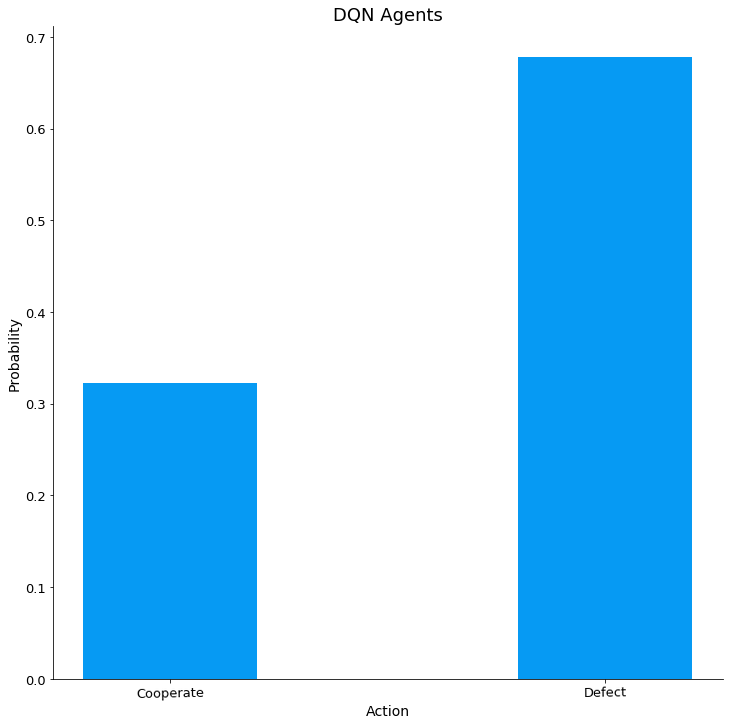

In [72]:
dqn_lt_30_avg_coop_percent = df_lt_30_dqn["tr_cooperation_percentage"].sum() / len(df_lt_30_dqn)
dqn_lt_30_avg_defect_percent = df_lt_30_dqn["tr_defection_percentage"].sum() / len(df_lt_30_dqn)
plot_barchart({"Action" : ["Cooperate", "Defect"], "Probability" : [dqn_lt_30_avg_coop_percent, dqn_lt_30_avg_defect_percent]}, "Action", "Probability", "DQN Agents")
plt.savefig("strategy_worst_30_dqn.png")

<h4>It looks as if even the worst performing tabular learners are cooperative; on the other hand, poorly performing DQN agents seem to be mainly defective.</h4>

<h2><center>Are agents with a high discount factor more cooperative?</center></h2>

In [73]:
cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))

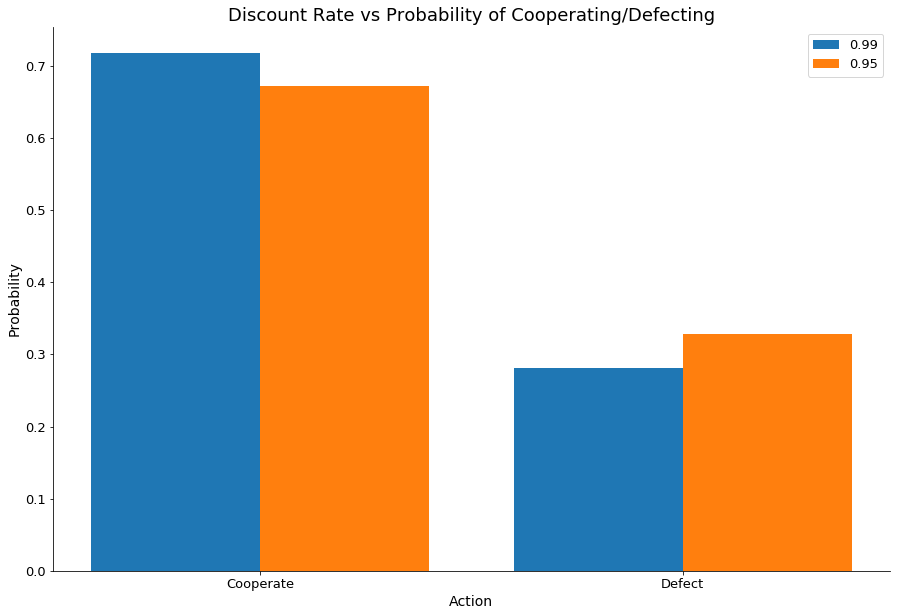

In [74]:
df_dr_99 = df[df["discount_rate"] == 0.99]
df_dr_95 = df[df["discount_rate"] == 0.95]

avg_coop_percent_dr_99 = df_dr_99["tr_cooperation_percentage"].sum() / len(df_dr_99)
avg_coop_percent_dr_95 = df_dr_95["tr_cooperation_percentage"].sum() / len(df_dr_95)
avg_defect_percent_dr_99 = df_dr_99["tr_defection_percentage"].sum() / len(df_dr_99)
avg_defect_percent_dr_95 = df_dr_95["tr_defection_percentage"].sum() / len(df_dr_95)

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.2, [avg_coop_percent_dr_99, avg_defect_percent_dr_99], 0.4, label="0.99")
plt.bar(x_axis + 0.2, [avg_coop_percent_dr_95, avg_defect_percent_dr_95], 0.4, label="0.95")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Discount Rate vs Probability of Cooperating/Defecting")
plt.legend()

<h4>As expected, it looks as though the probability of cooperating increases with discount rate, which can be explained by the fact that future rewards from cooperation are valued more highly.</h4>

<h3><center>Does this hold up for tabular and DQN?</center></h3>

In [75]:
df_dr_99_tab = df_dr_99[pd.isnull(df_dr_99["ModelType"])]
df_dr_99_dqn = df_dr_99[df_dr_99["ModelType"] == "DQN"]
df_dr_95_tab = df_dr_95[pd.isnull(df_dr_95["ModelType"])]
df_dr_95_dqn = df_dr_95[df_dr_95["ModelType"] == "DQN"]

avg_coop_percent_dr_99_tab = df_dr_99_tab["tr_cooperation_percentage"].sum() / len(df_dr_99_tab)
avg_coop_percent_dr_95_tab = df_dr_95_tab["tr_cooperation_percentage"].sum() / len(df_dr_95_tab)
avg_defect_percent_dr_99_tab = df_dr_99_tab["tr_defection_percentage"].sum() / len(df_dr_99_tab)
avg_defect_percent_dr_95_tab = df_dr_95_tab["tr_defection_percentage"].sum() / len(df_dr_95_tab)

avg_coop_percent_dr_99_dqn = df_dr_99_dqn["tr_cooperation_percentage"].sum() / len(df_dr_99_dqn)
avg_coop_percent_dr_95_dqn = df_dr_95_dqn["tr_cooperation_percentage"].sum() / len(df_dr_95_dqn)
avg_defect_percent_dr_99_dqn = df_dr_99_dqn["tr_defection_percentage"].sum() / len(df_dr_99_dqn)
avg_defect_percent_dr_95_dqn = df_dr_95_dqn["tr_defection_percentage"].sum() / len(df_dr_95_dqn)

In [76]:
print(f"Difference in probability of cooperating for tabular is {avg_coop_percent_dr_99_tab - avg_coop_percent_dr_95_tab}")
print(f"Difference in probability of cooperating for DQN is {avg_coop_percent_dr_99_dqn - avg_coop_percent_dr_95_dqn}")

Difference in probability of cooperating for tabular is 0.030244836692332466
Difference in probability of cooperating for DQN is 0.0427806604577905


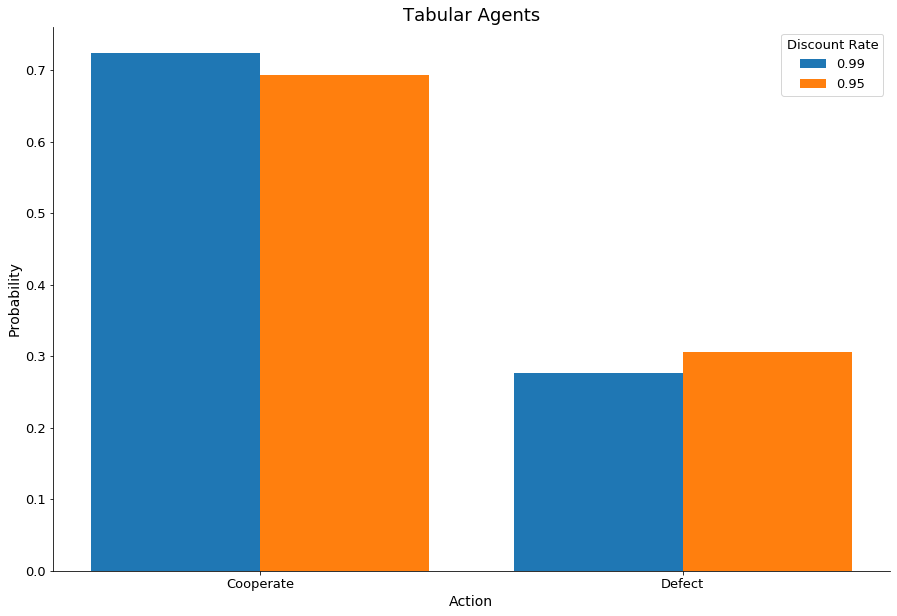

In [77]:
plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.2, [avg_coop_percent_dr_99_tab, avg_defect_percent_dr_99_tab], 0.4, label="0.99")
plt.bar(x_axis + 0.2, [avg_coop_percent_dr_95_tab, avg_defect_percent_dr_95_tab], 0.4, label="0.95")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents")
plt.legend(title="Discount Rate")

plt.savefig("strategyvsdiscount_tab.png")

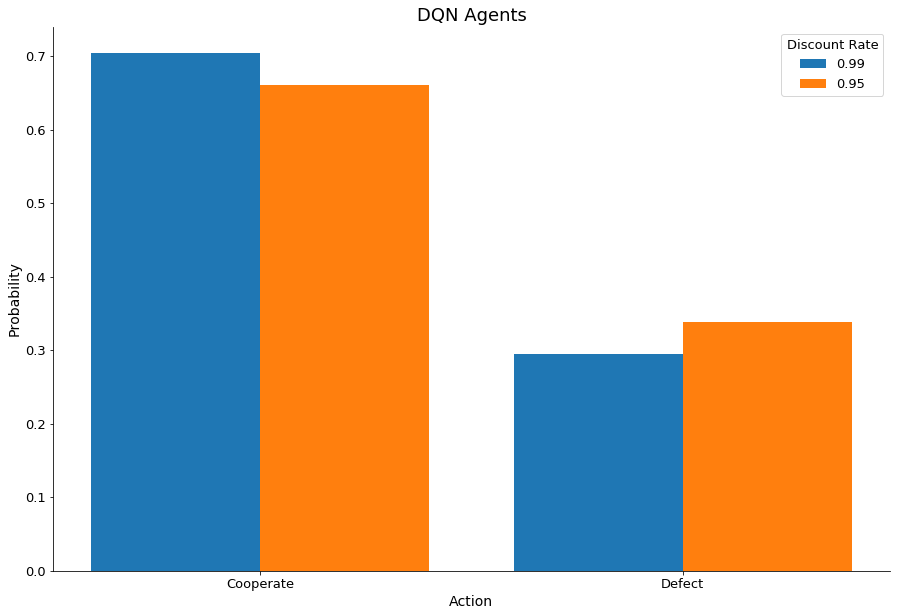

In [78]:
plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.2, [avg_coop_percent_dr_99_dqn, avg_defect_percent_dr_99_dqn], 0.4, label="0.99")
plt.bar(x_axis + 0.2, [avg_coop_percent_dr_95_dqn, avg_defect_percent_dr_95_dqn], 0.4, label="0.95")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("DQN Agents")
plt.legend(title="Discount Rate")
plt.savefig("strategyvsdiscount_dqn.png")

<h2><center>Does a longer lookback impact cooperation?</center></h2>

In [79]:
df.columns

Index(['ModelType', 'agents', 'decay_limit', 'discount_rate', 'epsilon',
       'epsilon_decay', 'hidden_size', 'learning_rate', 'lookback', 'n1', 'n2',
       'num_layers', 'tn_mean_score', 'tn_mean_time', 'tn_rank',
       'tr_cooperation_percentage', 'tr_cumul_regret', 'tr_cumul_reward',
       'tr_defection_percentage', 'tr_final_loss', 'tr_mean_reward'],
      dtype='object')

In [80]:
df["lookback"].value_counts()

8.0     785
4.0     750
1.0     729
2.0     619
10.0    573
6.0     318
5.0      18
Name: lookback, dtype: int64

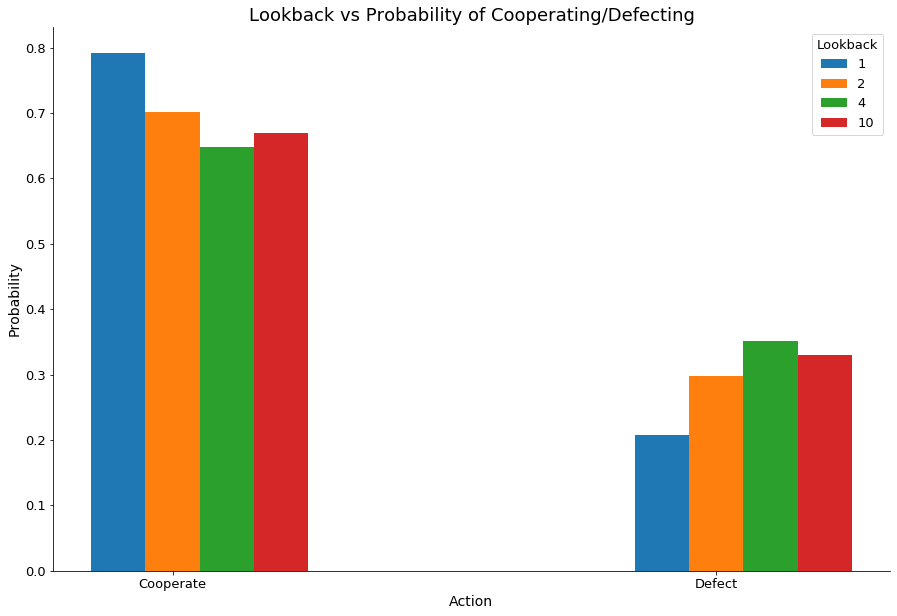

In [81]:
# choose the ones with highest frequency of runs.
df_lb_1 = df[df["lookback"] == 1]
df_lb_2 = df[df["lookback"] == 2]
df_lb_4 = df[df["lookback"] == 4]
df_lb_10 = df[df["lookback"] == 10]

avg_coop_lb_1 = df_lb_1["tr_cooperation_percentage"].sum() / len(df_lb_1)
avg_defect_lb_1 = df_lb_1["tr_defection_percentage"].sum() / len(df_lb_1)
avg_coop_lb_2 = df_lb_2["tr_cooperation_percentage"].sum() / len(df_lb_2)
avg_defect_lb_2 = df_lb_2["tr_defection_percentage"].sum() / len(df_lb_2)
avg_coop_lb_4 = df_lb_4["tr_cooperation_percentage"].sum() / len(df_lb_4)
avg_defect_lb_4 = df_lb_4["tr_defection_percentage"].sum() / len(df_lb_4)
avg_coop_lb_10 = df_lb_10["tr_cooperation_percentage"].sum() / len(df_lb_10)
avg_defect_lb_10 = df_lb_10["tr_defection_percentage"].sum() / len(df_lb_10)

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.1, [avg_coop_lb_1, avg_defect_lb_1], 0.1, label="1")
plt.bar(x_axis, [avg_coop_lb_2, avg_defect_lb_2], 0.1, label="2")
plt.bar(x_axis + 0.1, [avg_coop_lb_4, avg_defect_lb_4], 0.1, label="4")
plt.bar(x_axis + 0.2, [avg_coop_lb_10, avg_defect_lb_10], 0.1, label="10")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Lookback vs Probability of Cooperating/Defecting")
plt.legend(title="Lookback")

<h3><center>Does this hold up for DQN and Tabular agents?</center></h3>

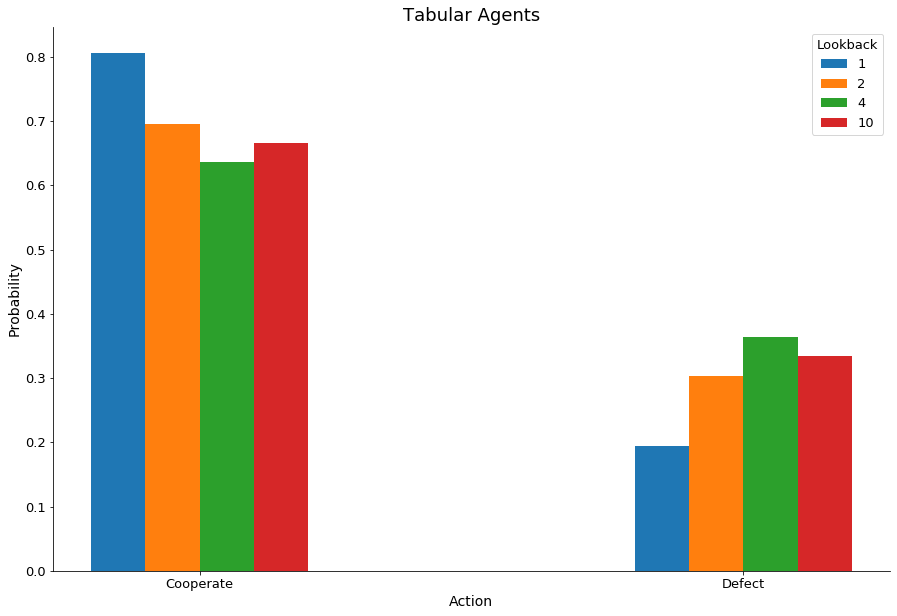

In [82]:
# choose the ones with highest frequency of runs.
df_lb_1_tab = df_lb_1[pd.isnull(df_lb_1["ModelType"])]
df_lb_2_tab = df_lb_2[pd.isnull(df_lb_2["ModelType"])]
df_lb_4_tab = df_lb_4[pd.isnull(df_lb_4["ModelType"])]
df_lb_10_tab = df_lb_10[pd.isnull(df_lb_10["ModelType"])]

avg_coop_lb_1_tab = df_lb_1_tab["tr_cooperation_percentage"].sum() / len(df_lb_1_tab)
avg_defect_lb_1_tab = df_lb_1_tab["tr_defection_percentage"].sum() / len(df_lb_1_tab)
avg_coop_lb_2_tab = df_lb_2_tab["tr_cooperation_percentage"].sum() / len(df_lb_2_tab)
avg_defect_lb_2_tab = df_lb_2_tab["tr_defection_percentage"].sum() / len(df_lb_2_tab)
avg_coop_lb_4_tab = df_lb_4_tab["tr_cooperation_percentage"].sum() / len(df_lb_4_tab)
avg_defect_lb_4_tab = df_lb_4_tab["tr_defection_percentage"].sum() / len(df_lb_4_tab)
avg_coop_lb_10_tab = df_lb_10_tab["tr_cooperation_percentage"].sum() / len(df_lb_10_tab)
avg_defect_lb_10_tab = df_lb_10_tab["tr_defection_percentage"].sum() / len(df_lb_10_tab)

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.15, [avg_coop_lb_1_tab, avg_defect_lb_1_tab], 0.1, label="1")
plt.bar(x_axis - 0.05, [avg_coop_lb_2_tab, avg_defect_lb_2_tab], 0.1, label="2")
plt.bar(x_axis + 0.05, [avg_coop_lb_4_tab, avg_defect_lb_4_tab], 0.1, label="4")
plt.bar(x_axis + 0.15, [avg_coop_lb_10_tab, avg_defect_lb_10_tab], 0.1, label="10")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents")
plt.legend(title="Lookback")
plt.savefig("strategyvslookback_tab.png")

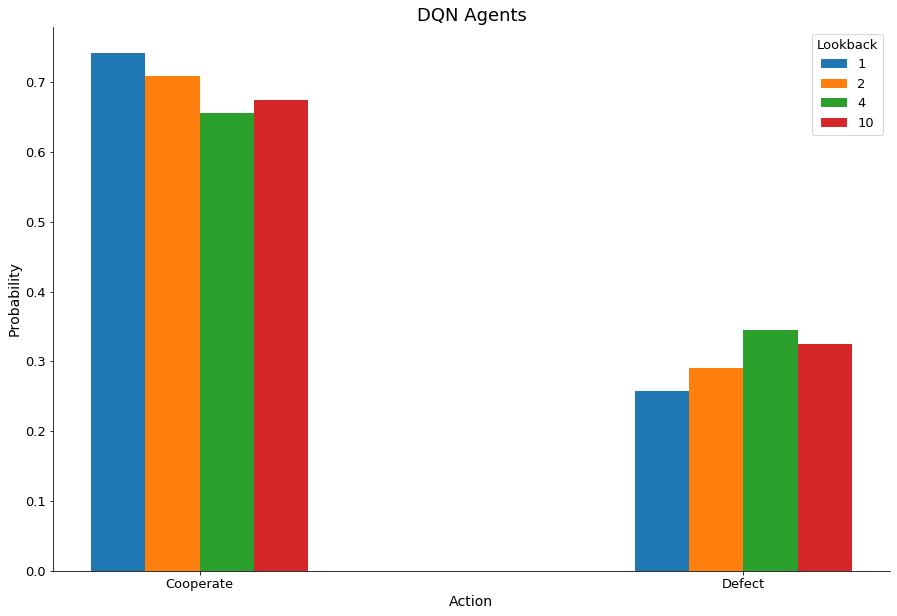

In [83]:
# choose the ones with highest frequency of runs.
df_lb_1_dqn = df_lb_1[df_lb_1["ModelType"] == "DQN"]
df_lb_2_dqn = df_lb_2[df_lb_2["ModelType"] == "DQN"]
df_lb_4_dqn = df_lb_4[df_lb_4["ModelType"] == "DQN"]
df_lb_10_dqn = df_lb_10[df_lb_10["ModelType"] == "DQN"]

avg_coop_lb_1_dqn = df_lb_1_dqn["tr_cooperation_percentage"].sum() / len(df_lb_1_dqn)
avg_defect_lb_1_dqn = df_lb_1_dqn["tr_defection_percentage"].sum() / len(df_lb_1_dqn)
avg_coop_lb_2_dqn = df_lb_2_dqn["tr_cooperation_percentage"].sum() / len(df_lb_2_dqn)
avg_defect_lb_2_dqn = df_lb_2_dqn["tr_defection_percentage"].sum() / len(df_lb_2_dqn)
avg_coop_lb_4_dqn = df_lb_4_dqn["tr_cooperation_percentage"].sum() / len(df_lb_4_dqn)
avg_defect_lb_4_dqn = df_lb_4_dqn["tr_defection_percentage"].sum() / len(df_lb_4_dqn)
avg_coop_lb_10_dqn = df_lb_10_dqn["tr_cooperation_percentage"].sum() / len(df_lb_10_dqn)
avg_defect_lb_10_dqn = df_lb_10_dqn["tr_defection_percentage"].sum() / len(df_lb_10_dqn)

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.15, [avg_coop_lb_1_dqn, avg_defect_lb_1_dqn], 0.1, label="1")
plt.bar(x_axis - 0.05, [avg_coop_lb_2_dqn, avg_defect_lb_2_dqn], 0.1, label="2")
plt.bar(x_axis + 0.05, [avg_coop_lb_4_dqn, avg_defect_lb_4_dqn], 0.1, label="4")
plt.bar(x_axis + 0.15, [avg_coop_lb_10_dqn, avg_defect_lb_10_dqn], 0.1, label="10")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("DQN Agents")
plt.legend(title="Lookback")
plt.savefig("strategyvslookback_dqn.png")

<h4>Looks like this trend is consistent across agents.</h4>

<h2><center>Does epsilon impact probability of cooperating?</center></h2>

In [84]:
df["epsilon"].value_counts()

0.20    1373
0.10    1294
0.05     585
0.01     311
0.30     216
0.15      12
0.25       1
Name: epsilon, dtype: int64

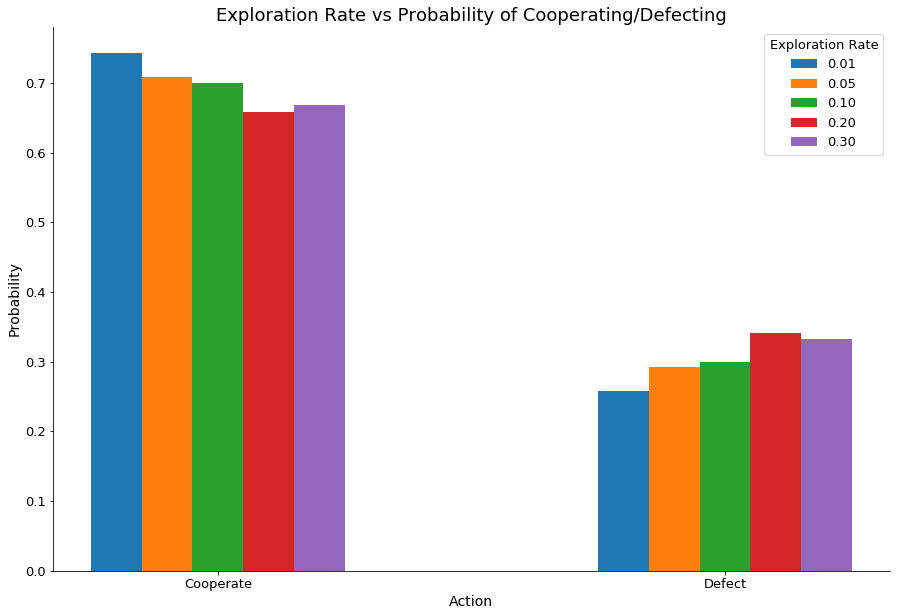

In [85]:
avg_coop_percent_epsil_01 = df[df["epsilon"] == 0.01]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.01])
avg_coop_percent_epsil_05 = df[df["epsilon"] == 0.05]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.05])
avg_coop_percent_epsil_10 = df[df["epsilon"] == 0.1]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.1])
avg_coop_percent_epsil_20 = df[df["epsilon"] == 0.2]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.2])
avg_coop_percent_epsil_30 = df[df["epsilon"] == 0.3]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.3])

avg_defect_percent_epsil_01 = df[df["epsilon"] == 0.01]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.01])
avg_defect_percent_epsil_05 = df[df["epsilon"] == 0.05]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.05])
avg_defect_percent_epsil_10 = df[df["epsilon"] == 0.1]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.1])
avg_defect_percent_epsil_20 = df[df["epsilon"] == 0.2]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.2])
avg_defect_percent_epsil_30 = df[df["epsilon"] == 0.3]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.3])

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.2, [avg_coop_percent_epsil_01, avg_defect_percent_epsil_01], 0.1, label="0.01")
plt.bar(x_axis - 0.1, [avg_coop_percent_epsil_05, avg_defect_percent_epsil_05], 0.1, label="0.05")
plt.bar(x_axis, [avg_coop_percent_epsil_10, avg_defect_percent_epsil_10], 0.1, label="0.10")
plt.bar(x_axis + 0.1, [avg_coop_percent_epsil_20, avg_defect_percent_epsil_20], 0.1, label="0.20")
plt.bar(x_axis + 0.2, [avg_coop_percent_epsil_30, avg_defect_percent_epsil_30], 0.1, label="0.30")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Exploration Rate vs Probability of Cooperating/Defecting")
plt.legend(title="Exploration Rate")

<h3><center>Does this hold up for tabular and DQN?</center></h3>

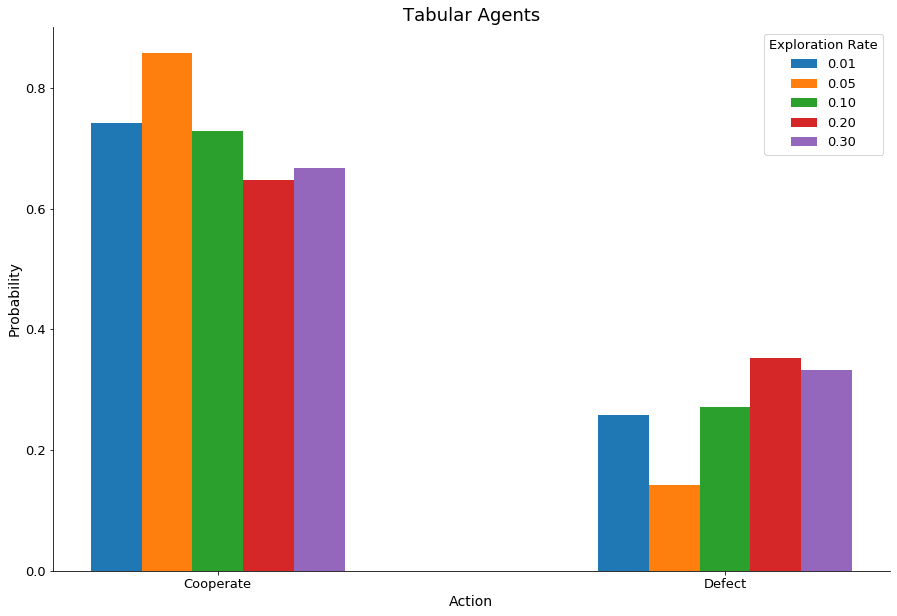

In [86]:
avg_coop_percent_epsil_01_tab = df_tabular[df_tabular["epsilon"] == 0.01]["tr_cooperation_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.01])
avg_coop_percent_epsil_05_tab = df_tabular[df_tabular["epsilon"] == 0.05]["tr_cooperation_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.05])
avg_coop_percent_epsil_10_tab = df_tabular[df_tabular["epsilon"] == 0.1]["tr_cooperation_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.1])
avg_coop_percent_epsil_20_tab = df_tabular[df_tabular["epsilon"] == 0.2]["tr_cooperation_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.2])
avg_coop_percent_epsil_30_tab = df_tabular[df_tabular["epsilon"] == 0.3]["tr_cooperation_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.3])

avg_defect_percent_epsil_01_tab = df_tabular[df_tabular["epsilon"] == 0.01]["tr_defection_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.01])
avg_defect_percent_epsil_05_tab = df_tabular[df_tabular["epsilon"] == 0.05]["tr_defection_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.05])
avg_defect_percent_epsil_10_tab = df_tabular[df_tabular["epsilon"] == 0.1]["tr_defection_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.1])
avg_defect_percent_epsil_20_tab = df_tabular[df_tabular["epsilon"] == 0.2]["tr_defection_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.2])
avg_defect_percent_epsil_30_tab = df_tabular[df_tabular["epsilon"] == 0.3]["tr_defection_percentage"].sum() / len(df_tabular[df_tabular["epsilon"] == 0.3])

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.2, [avg_coop_percent_epsil_01_tab, avg_defect_percent_epsil_01_tab], 0.1, label="0.01")
plt.bar(x_axis - 0.1, [avg_coop_percent_epsil_05_tab, avg_defect_percent_epsil_05_tab], 0.1, label="0.05")
plt.bar(x_axis, [avg_coop_percent_epsil_10_tab, avg_defect_percent_epsil_10_tab], 0.1, label="0.10")
plt.bar(x_axis + 0.1, [avg_coop_percent_epsil_20_tab, avg_defect_percent_epsil_20_tab], 0.1, label="0.20")
plt.bar(x_axis + 0.2, [avg_coop_percent_epsil_30_tab, avg_defect_percent_epsil_30_tab], 0.1, label="0.30")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents")
plt.legend(title="Exploration Rate")
plt.savefig("strategyvsexploration_tab.png")

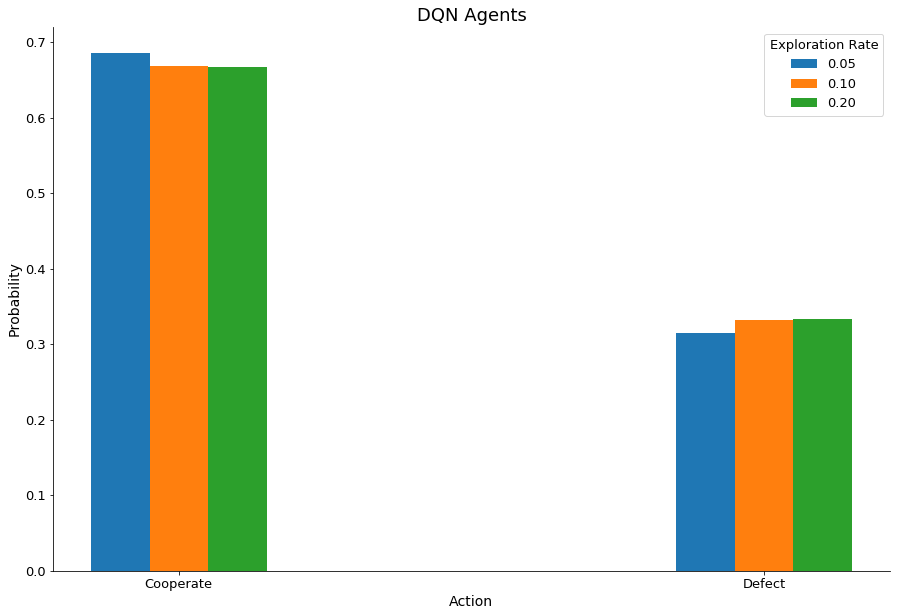

In [87]:
avg_coop_percent_epsil_05_dqn = df_dqn[df_dqn["epsilon"] == 0.05]["tr_cooperation_percentage"].sum() / len(df_dqn[df_dqn["epsilon"] == 0.05])
avg_coop_percent_epsil_10_dqn = df_dqn[df_dqn["epsilon"] == 0.1]["tr_cooperation_percentage"].sum() / len(df_dqn[df_dqn["epsilon"] == 0.1])
avg_coop_percent_epsil_20_dqn = df_dqn[df_dqn["epsilon"] == 0.2]["tr_cooperation_percentage"].sum() / len(df_dqn[df_dqn["epsilon"] == 0.2])

avg_defect_percent_epsil_05_dqn = df_dqn[df_dqn["epsilon"] == 0.05]["tr_defection_percentage"].sum() / len(df_dqn[df_dqn["epsilon"] == 0.05])
avg_defect_percent_epsil_10_dqn = df_dqn[df_dqn["epsilon"] == 0.1]["tr_defection_percentage"].sum() / len(df_dqn[df_dqn["epsilon"] == 0.1])
avg_defect_percent_epsil_20_dqn = df_dqn[df_dqn["epsilon"] == 0.2]["tr_defection_percentage"].sum() / len(df_dqn[df_dqn["epsilon"] == 0.2])

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.1, [avg_coop_percent_epsil_05_dqn, avg_defect_percent_epsil_05_dqn], 0.1, label="0.05")
plt.bar(x_axis, [avg_coop_percent_epsil_10_dqn, avg_defect_percent_epsil_10_dqn], 0.1, label="0.10")
plt.bar(x_axis + 0.1, [avg_coop_percent_epsil_20_dqn, avg_defect_percent_epsil_20_dqn], 0.1, label="0.20")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("DQN Agents")
plt.legend(title="Exploration Rate")
plt.savefig("strategyvsexploration_dqn.png")

<h2><center>Does learning rate affect probability of cooperating?</center></h2>

In [88]:
df["learning_rate"].value_counts()

0.010    1711
0.001    1296
0.100     751
0.005      24
0.200      10
Name: learning_rate, dtype: int64

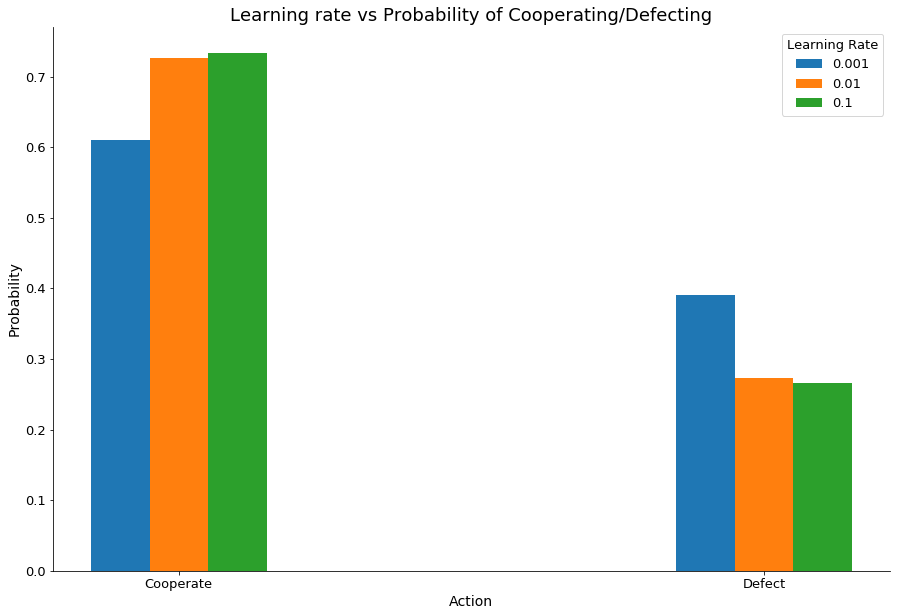

In [89]:
avg_coop_lr_001 = df[df["learning_rate"] == 0.001]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.001])
avg_coop_lr_01 = df[df["learning_rate"] == 0.01]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.01])
avg_coop_lr_1 = df[df["learning_rate"] == 0.1]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.1])

avg_defect_lr_001 = df[df["learning_rate"] == 0.001]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.001])
avg_defect_lr_01 = df[df["learning_rate"] == 0.01]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.01])
avg_defect_lr_1 = df[df["learning_rate"] == 0.1]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.1])

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.1, [avg_coop_lr_001, avg_defect_lr_001], 0.1, label="0.001")
plt.bar(x_axis, [avg_coop_lr_01, avg_defect_lr_01], 0.1, label="0.01")
plt.bar(x_axis + 0.1, [avg_coop_lr_1, avg_defect_lr_1], 0.1, label="0.1")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Learning rate vs Probability of Cooperating/Defecting")
plt.legend(title="Learning Rate")

<h3><center>Does this hold up for tabular and DQN?</center></h3>

In [90]:
df_tabular["learning_rate"].value_counts()

0.010    781
0.100    751
0.001    356
0.200     10
Name: learning_rate, dtype: int64

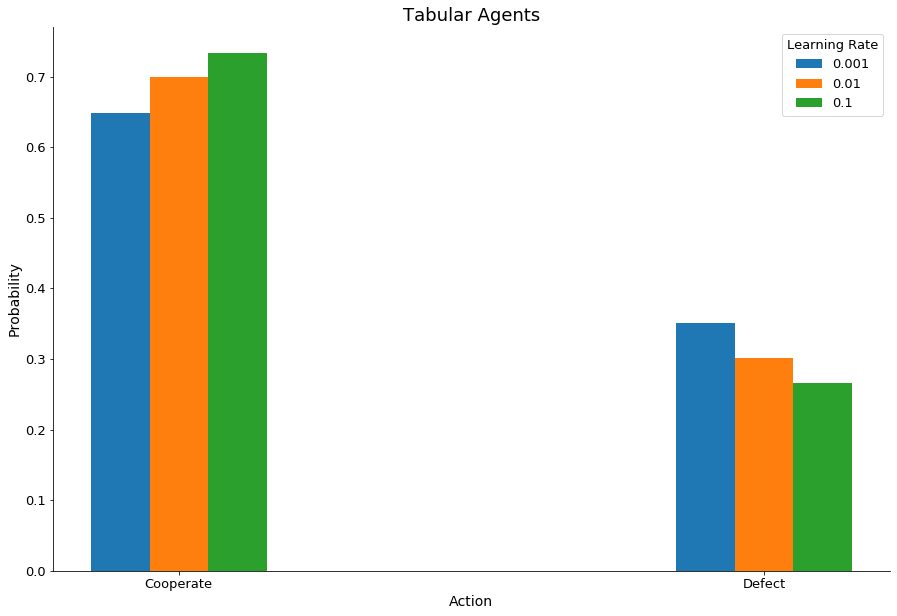

In [91]:
avg_coop_lr_001_tab = df_tabular[df_tabular["learning_rate"] == 0.001]["tr_cooperation_percentage"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.001])
avg_coop_lr_01_tab = df_tabular[df_tabular["learning_rate"] == 0.01]["tr_cooperation_percentage"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.01])
avg_coop_lr_1_tab = df_tabular[df_tabular["learning_rate"] == 0.1]["tr_cooperation_percentage"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.1])

avg_defect_lr_001_tab = df_tabular[df_tabular["learning_rate"] == 0.001]["tr_defection_percentage"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.001])
avg_defect_lr_01_tab = df_tabular[df_tabular["learning_rate"] == 0.01]["tr_defection_percentage"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.01])
avg_defect_lr_1_tab = df_tabular[df_tabular["learning_rate"] == 0.1]["tr_defection_percentage"].sum() / len(df_tabular[df_tabular["learning_rate"] == 0.1])

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.1, [avg_coop_lr_001_tab, avg_defect_lr_001_tab], 0.1, label="0.001")
plt.bar(x_axis, [avg_coop_lr_01_tab, avg_defect_lr_01_tab], 0.1, label="0.01")
plt.bar(x_axis + 0.1, [avg_coop_lr_1_tab, avg_defect_lr_1_tab], 0.1, label="0.1")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("Tabular Agents")
plt.legend(title="Learning Rate")
plt.savefig("strategyvslearning_tab.png")

In [92]:
df_dqn["learning_rate"].value_counts()

0.001    940
0.010    930
0.005     24
Name: learning_rate, dtype: int64

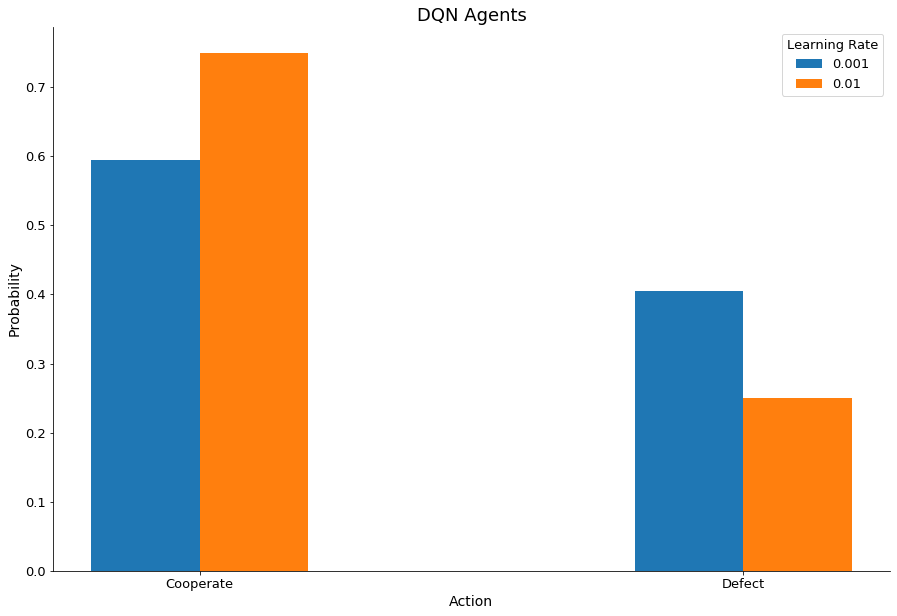

In [93]:
avg_coop_lr_001_dqn = df_dqn[df_dqn["learning_rate"] == 0.001]["tr_cooperation_percentage"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.001])
avg_coop_lr_01_dqn = df_dqn[df_dqn["learning_rate"] == 0.01]["tr_cooperation_percentage"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.01])

avg_defect_lr_001_dqn = df_dqn[df_dqn["learning_rate"] == 0.001]["tr_defection_percentage"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.001])
avg_defect_lr_01_dqn = df_dqn[df_dqn["learning_rate"] == 0.01]["tr_defection_percentage"].sum() / len(df_dqn[df_dqn["learning_rate"] == 0.01])

plt.figure(figsize=(15,10))
plt.bar(x_axis - 0.1, [avg_coop_lr_001_dqn, avg_defect_lr_001_dqn], 0.2, label="0.001")
plt.bar(x_axis + 0.1, [avg_coop_lr_01_dqn, avg_defect_lr_01_dqn], 0.2, label="0.01")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Probability")
plt.title("DQN Agents")
plt.legend(title="Learning Rate")
plt.savefig("strategyvslearning_dqn.png")

In [94]:
df_dqn["epsilon"].value_counts()

0.20    760
0.10    614
0.05    507
0.15     12
0.25      1
Name: epsilon, dtype: int64

<h2><center>Are there certain agents that if we train against, our agent will do well in the tournament?</center></h2>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

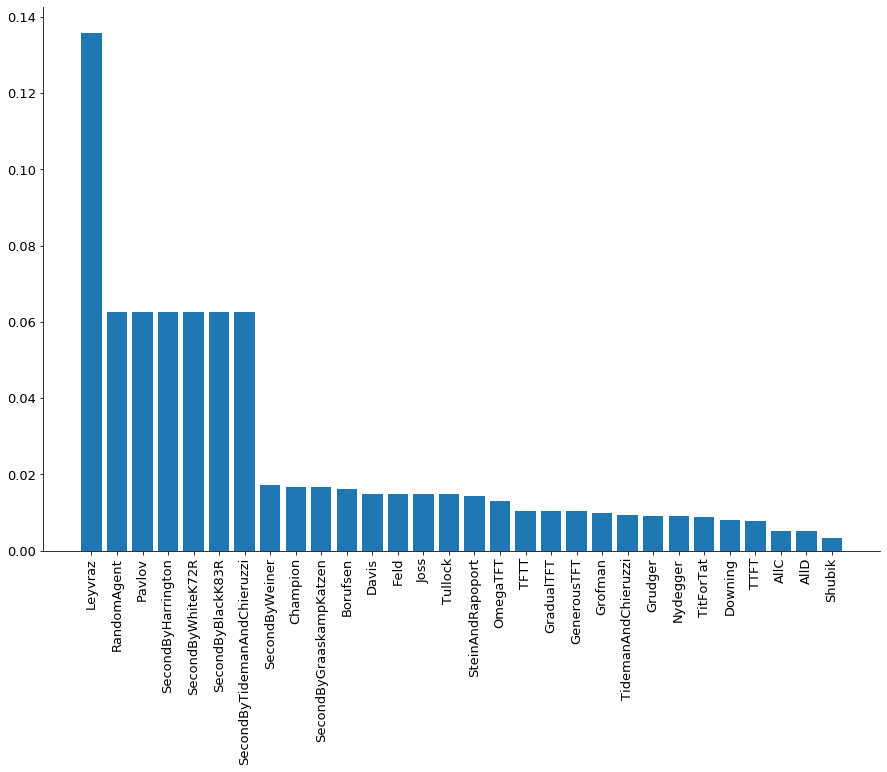

In [95]:
top_5_agent_counts = {}
for row_idx, row in df_top_5.iterrows():
    for agent in str(row["agents"]).split(","):
        if agent in top_5_agent_counts:
            top_5_agent_counts[agent] += 1
        else:
            top_5_agent_counts[agent] = 1
            
all_agent_counts = {}
for row_idx, row in df.iterrows():
    for agent in str(row["agents"]).split(","):
        if agent in all_agent_counts:
            all_agent_counts[agent] += 1
        else:
            all_agent_counts[agent] = 1
            
prop_agents_top_5 = {}
for agent in top_5_agent_counts:
    prop_agents_top_5[agent] = top_5_agent_counts[agent] / all_agent_counts[agent]
sorted_prop_agents = {k:v for k, v in sorted(prop_agents_top_5.items(), key=lambda x: x[1], reverse=True)}


plt.figure(figsize=(15,10))
plt.bar(sorted_prop_agents.keys(), sorted_prop_agents.values())
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(rotation=90)